<a href="https://colab.research.google.com/github/Hritesh-Moitra/Hritesh-Moitra/blob/main/CapstoneprojectpythonandDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction to the project**
###**Tools used for the project**
1. Python 
2. Pyspark
3. MySQL.

We are having a dataset containing records of the olympics games which were held in various years.
The datset contains:-
1. The names of the athletes.
2. Their respective ages during the years they played.
3. The country names which the athletes are representing.
4. The years in which the olympic games were held.
5. The specific dates in those years when the games were conducted.
6. The different games which were played by the athletes during the
   olympics.
7. The gold medals the athletes won for the games they played.
8. The silver medals the athletes won for the games they played.
9. The bronze medals the athletes won for the games they played.
10. The total number of medals the athletes won in total.

We have to look for missing records as well as duplicate records and deal with them accordingly.
Further we are required to do a basic exploration of the dataset and then accordingly perform visualizations , extraction and normalization operations for required columns.


###**Pyspark and SQL**

We also need to perform data visualization and data extraction using pyspark and write sql queries to extract data for the asked problem statements from the dataset by importing the dataset to MySQL workbench. 

In [ ]:
'''importing the pandas package for data analysis and data manipulation;
importing the numpy package to perform needed calculations;
importing matplotlib library and seaborn library to perform visualizations on the dataset.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
'''reading the csv file and storing it to a varble named as olymp_data'''

olymp_data=pd.read_csv('/content/olympix_data_organized_with_header (1) (1).csv')
olymp_data.head(10) ##displaying the first 10 records of the dataset

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,8/24/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,8/29/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,08-12-2012,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,8/24/2008,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,10-01-2000,Gymnastics,2,1,3,6
5,Alicia Coutts,24.0,Australia,2012,08-12-2012,Swimming,1,3,1,5
6,Missy Franklin,17.0,United States,2012,08-12-2012,Swimming,4,0,1,5
7,Ryan Lochte,27.0,United States,2012,08-12-2012,Swimming,2,2,1,5
8,Allison Schmitt,22.0,United States,2012,08-12-2012,Swimming,3,1,1,5
9,Natalie Coughlin,21.0,United States,2004,8/29/2004,Swimming,2,2,1,5


In [ ]:
olymp_data.shape ##displaying the dimensions of the dataset, i.e the total number of rows and columns present in the dataset.

(8618, 10)

In [ ]:
olymp_data.info() ##getting the datatypes information present in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8613 non-null   object 
 1   age           8613 non-null   float64
 2   country       8618 non-null   object 
 3   year          8618 non-null   int64  
 4   Date_Given    8618 non-null   object 
 5   sports        8618 non-null   object 
 6   gold_medal    8618 non-null   int64  
 7   silver_medal  8618 non-null   int64  
 8   brone_medal   8618 non-null   int64  
 9   total_medal   8618 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 673.4+ KB


In [ ]:
olymp_data['Date_Given'] = pd.to_datetime(olymp_data['Date_Given']) ##converting Date_Given to date-time format from object datatype.
olymp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          8613 non-null   object        
 1   age           8613 non-null   float64       
 2   country       8618 non-null   object        
 3   year          8618 non-null   int64         
 4   Date_Given    8618 non-null   datetime64[ns]
 5   sports        8618 non-null   object        
 6   gold_medal    8618 non-null   int64         
 7   silver_medal  8618 non-null   int64         
 8   brone_medal   8618 non-null   int64         
 9   total_medal   8618 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 673.4+ KB


In [ ]:
olymp_data.head(5) ##displaying the first five rows of the dataframe.

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6


In [ ]:
olymp_data.describe() ##getting statistical summary of all the numerical columns present in the dataset.

,age,year,gold_medal,silver_medal,brone_medal,total_medal
count,8613.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,26.405434,2005.978881,0.364702,0.363309,0.377698,1.105709
std,5.102118,4.289946,0.545349,0.511613,0.505005,0.408892
min,15.000000,2000.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,2002.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,2012.000000,8.000000,3.000000,3.000000,8.000000


In [ ]:
##finding the athlete and country with most number of total_medals

athletes=olymp_data.groupby(by='name')['total_medal'].sum() ##creating a dataframe which will have the names of the athletes along with the total number of medals they won
athletes=athletes.sort_values(ascending=False) ##sorting the dataframe in descending order
print('player with most number of total medals:')
print(athletes.head(1))

##finding the country of the athlete
country=olymp_data.country[olymp_data['name']=='Michael Phelps'] ##creating a dataframe which will have the country name of the athlete with most number of total medals
print('country of the player with most total medals:')
country.head(1)

player with most number of total medals:
name
Michael Phelps    22
Name: total_medal, dtype: int64
country of the player with most total medals:


0    United States
Name: country, dtype: object

In [ ]:
##showing the count of athletes played in each year

df3=olymp_data.copy()
df3=df3.groupby(by='year') ['name'].count()
df3

year
2000    1840
2002     407
2004    1839
2006     443
2008    1872
2010     441
2012    1771
Name: name, dtype: int64

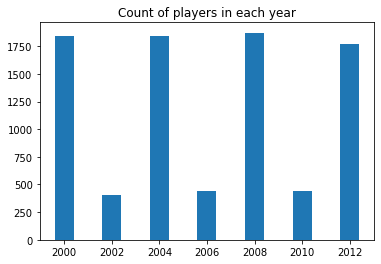

In [ ]:
##graph showing the number of players in each year
x=list(df3.index)
y=list(df3.values)
plt.title('Count of players in each year')
plt.bar(x,y)
plt.show()


In [ ]:
##Showing the total number of medals each country won

df4=olymp_data.copy()
df4=df4.groupby(by='country')['total_medal'].sum()
df4

country
Afghanistan      2
Algeria          8
Argentina      141
Armenia         10
Australia      609
              ... 
Uruguay          1
Uzbekistan      19
Venezuela        4
Vietnam          2
Zimbabwe         7
Name: total_medal, Length: 110, dtype: int64

In [ ]:
#showing the players representing their respective countries

df5=olymp_data.copy()
df5=df5.groupby(by='name')['country'].unique()
df5


name
A. J. Mleczko                 [United States]
Aaron Armstrong         [Trinidad and Tobago]
Aaron Egbele                        [Nigeria]
Aaron Gate                      [New Zealand]
Aaron McIntosh                  [New Zealand]
                                ...          
Øystein Pettersen                    [Norway]
Šarunas Jasikevicius              [Lithuania]
Štepánka Hilgertová          [Czech Republic]
Šárka Záhrobská              [Czech Republic]
Živko Gocic                          [Serbia]
Name: country, Length: 6956, dtype: object

In [ ]:
'''Finding null/missing values in the dataframe'''

olymp_data[olymp_data.isna().any(axis=1)] ##getting the rows with null or missing values present anywhere in the dataframe.

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1428,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4485,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1
4486,NaN,NaN,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
## Solution to deal with missing values

'''We have 5 rows in the datframe with missing values in the form of names and age of players, and all of them are from year 2012,
although the details of the players are missing but the medals won by the athlete's country are present, so, when we will be calculating
or looking for total medals won by different countries , in that case even a single count of the medal can have an impact on the results ,
so, I will keep the records with missing values and fill the , missing name records with not available and for age column with 0.''' 

"We have 5 rows in the datframe with missing values in the form of names and age of players, and all of them are from year 2012,\nalthough the details of the players are missing but the medals won by the athlete's country are present, so, when we will be calculating\nor looking for total medals won by different countries , in that case even a single count of the medal can have an impact on the results ,\nso, I will keep the records with missing values and fill the , missing name records with not available and for age column with 0."

In [ ]:
olymp_data.name=olymp_data.name.fillna('Not Available') ##filling the null values in name column with Not Available
olymp_data.age=olymp_data.age.fillna(0) ##fillling the missing values in age with 0
olymp_data.iloc[1428] ##displaying a previous record and checking whether the missing values are replaced with the newly assigned values or not.

name                  Not Available
age                             0.0
country                      Brazil
year                           2012
Date_Given      2012-08-12 00:00:00
sports                   Volleyball
gold_medal                        0
silver_medal                      1
brone_medal                       0
total_medal                       1
Name: 1428, dtype: object

In [ ]:
df2=olymp_data.copy() ##creating a dataframe df2 and copying all the data of olymp_data to df2
df2

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


In [ ]:
##removing all the special characters from the name column in the dataframe

'''using the regex library to match the name column values and then specifying those which should be kept in the value r complement and removing all other characters''' 
df2['name'].replace(regex=True, inplace=True, to_replace=r'[^A-Z a-z], value=r') ##regex=true for regex matching, r specifing the values to keep rest anything apart from them to be removed.
df2['name']

0            Michael Phelps
1            Michael Phelps
2            Michael Phelps
3          Natalie Coughlin
4             Aleksey Nemov
               ...         
8613       Olena Sadovnycha
8614       Kateryna Serdiuk
8615       Wietse van Alten
8616    Sandra WagnerSachse
8617              Rod White
Name: name, Length: 8618, dtype: object

In [ ]:
df2['name'].iloc[1407] ##checking for the name which earlier had special character.

'Bulcs Szkely'

In [ ]:
##finding the duplicate records in the dataframe

duplicate = olymp_data[olymp_data.duplicated()] ##the duplicated() function is used to find out the duplicated records, we are stroing the duplicate records in the variable duplicate. 
duplicate

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
1429,Not Available,0.0,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
1430,Not Available,0.0,Brazil,2012,2012-08-12,Volleyball,0,1,0,1
4486,Not Available,0.0,Argentina,2012,2012-08-12,Hockey,0,1,0,1


In [ ]:
'''we will be dropping the duplicate rows as they will add up to the total medal count for the countries with duplicate records and during
analysis if we compare countries with total medals a small margin of increase in value can affect the results.''' 

olymp_data=olymp_data.drop_duplicates() ## we are using drop_duplicates function to drop the duplicate records and then storing the data back to the dataframe after dropping the duplicate records. 
df2=olymp_data.copy() ##saving the changes to copied dataframe as well.
olymp_data

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
0,Michael Phelps,23.0,United States,2008,2008-08-24,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,2004-08-29,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,2012-08-12,Swimming,4,2,0,6
3,Natalie Coughlin,25.0,United States,2008,2008-08-24,Swimming,1,2,3,6
4,Aleksey Nemov,24.0,Russia,2000,2000-10-01,Gymnastics,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8614,Kateryna Serdiuk,17.0,Ukraine,2000,2000-10-01,Archery,0,1,0,1
8615,Wietse van Alten,21.0,Netherlands,2000,2000-10-01,Archery,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,Germany,2000,2000-10-01,Archery,0,0,1,1


In [ ]:
'''As we can observe the total number of rows have been decreased by a count of 3 , which means all the 3 duplictae rows have been dropped from the dataframe.'''

'As we can observe the total number of rows have been decreased by a count of 3 , which means all the 3 duplictae rows have been dropped from the dataframe.'

0.8228435580507557


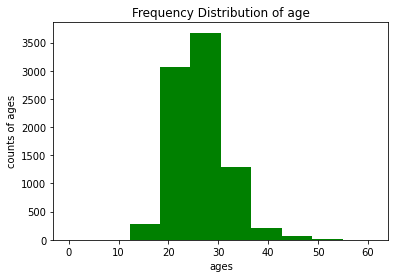

In [ ]:
##Data vizualization for different columns

##for age column:-

plt.title('Frequency Distribution of age')
plt.hist(olymp_data['age'],color='green')
plt.xlabel('ages')
plt.ylabel('counts of ages')
print(olymp_data['age'].skew(axis=0)) ##skew at axis=0 will show the skewness measure of age data 
plt.show()


In [ ]:

'''with the histogram we can consider the age data to be right skewed  ; as the mean of the ages is slightly greater than the median of ages.'''

'with the histogram we can consider the age data to be right skewed  ; as the mean of the ages is slightly greater than the median of ages.'

In [ ]:
df_10=olymp_data[olymp_data['year']==2010]
df_10 ##creating a datframe with records only for year 2010

,name,age,country,year,Date_Given,sports,gold_medal,silver_medal,brone_medal,total_medal
14,Marit Bjørgen,29.0,Norway,2010,2010-02-28,Cross Country Skiing,3,1,1,5
33,Petter Northug Jr.,24.0,Norway,2010,2010-02-28,Cross Country Skiing,2,1,1,4
86,Lee Jeong-Su,20.0,South Korea,2010,2010-02-28,Short-Track Speed Skating,2,1,0,3
87,Apolo Anton Ohno,27.0,United States,2010,2010-02-28,Short-Track Speed Skating,0,1,2,3
88,Wang Meng,24.0,China,2010,2010-02-28,Short-Track Speed Skating,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...
8515,Viktoria Rebensburg,20.0,Germany,2010,2010-02-28,Alpine Skiing,1,0,0,1
8516,Marlies Schild,28.0,Austria,2010,2010-02-28,Alpine Skiing,0,1,0,1
8517,Andrew Weibrecht,24.0,United States,2010,2010-02-28,Alpine Skiing,0,0,1,1
8518,Šárka Záhrobská,25.0,Czech Republic,2010,2010-02-28,Alpine Skiing,0,0,1,1


country
Canada            2
China             5
Czech Republic    2
Germany           4
Norway            7
South Korea       2
Sweden            2
Switzerland       2
Name: gold_medal, dtype: int64


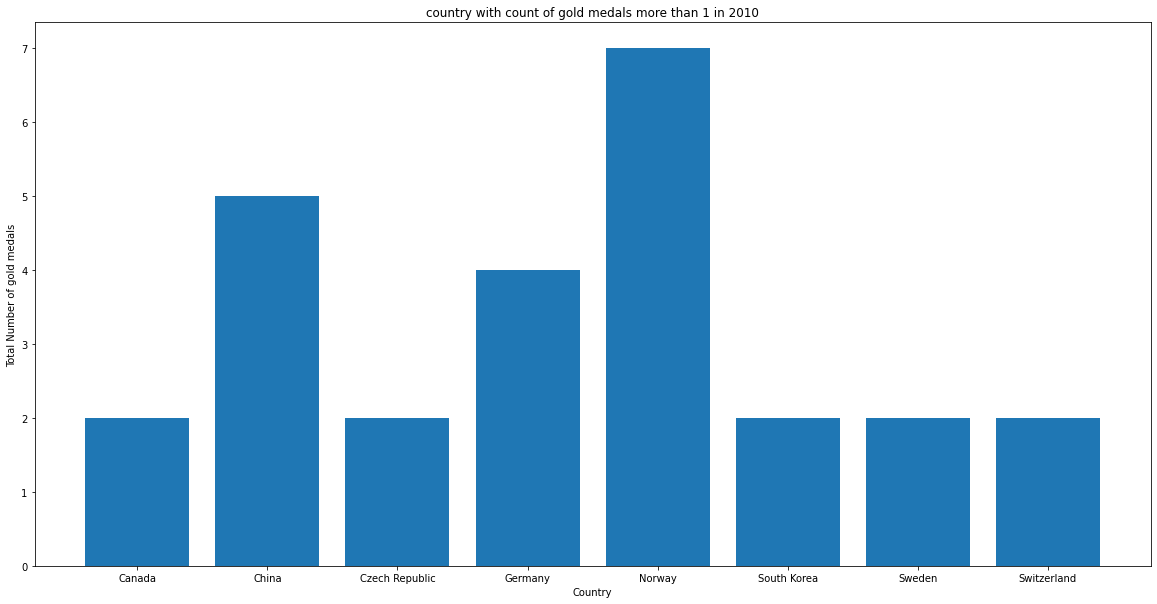

In [ ]:
res=df_10[df_10['gold_medal']>1] ##creating a dataframe for records with more than 1 gold medals in 2010
res1=res.groupby(by='country') ['gold_medal'].sum() ##grouping the countries with more than 1 gold medal and storing the total gold medals
print(res1)

x=list(res1.index)
y=list(res1.values)
plt.figure(figsize=(20,10))
plt.title('country with count of gold medals more than 1 in 2010')
plt.bar(x,y) ##plotting a bar graph for those countries who won more than 1 gold medal in 2010 along with their total gold medals.
plt.xlabel('Country')
plt.ylabel('Total Number of gold medals')
plt.show()

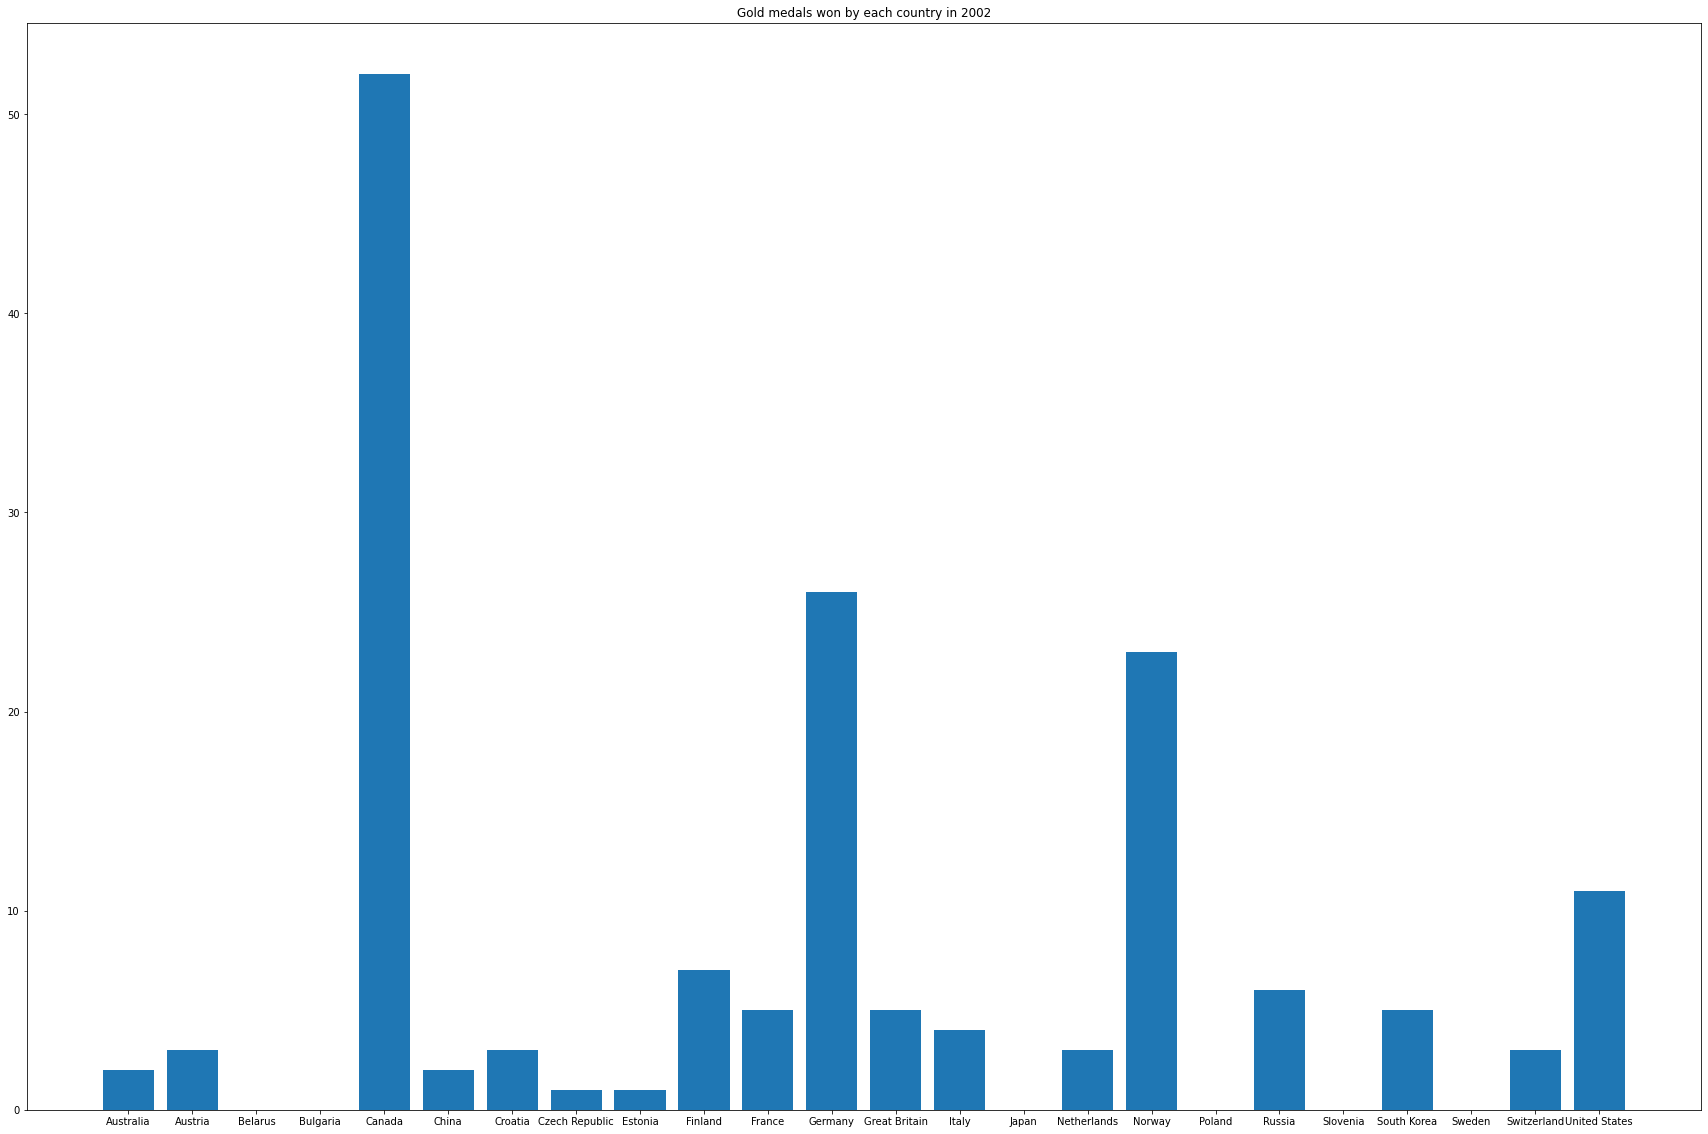

In [ ]:
df_2002=olymp_data[olymp_data['year']==2002] ##creating a dataframe with records for only with year 2002
res=df_2002.groupby(by='country')['gold_medal'].sum() ##grouping the countries along with their total gold medals won in 2002 
x=list(res.index) ##creating a list of the countries
y=list(res.values) ##creating a list of the total gold medals won by each country
plt.figure(figsize=(30,20))
plt.bar(x,y)
plt.title('Gold medals won by each country in 2002')
plt.show()

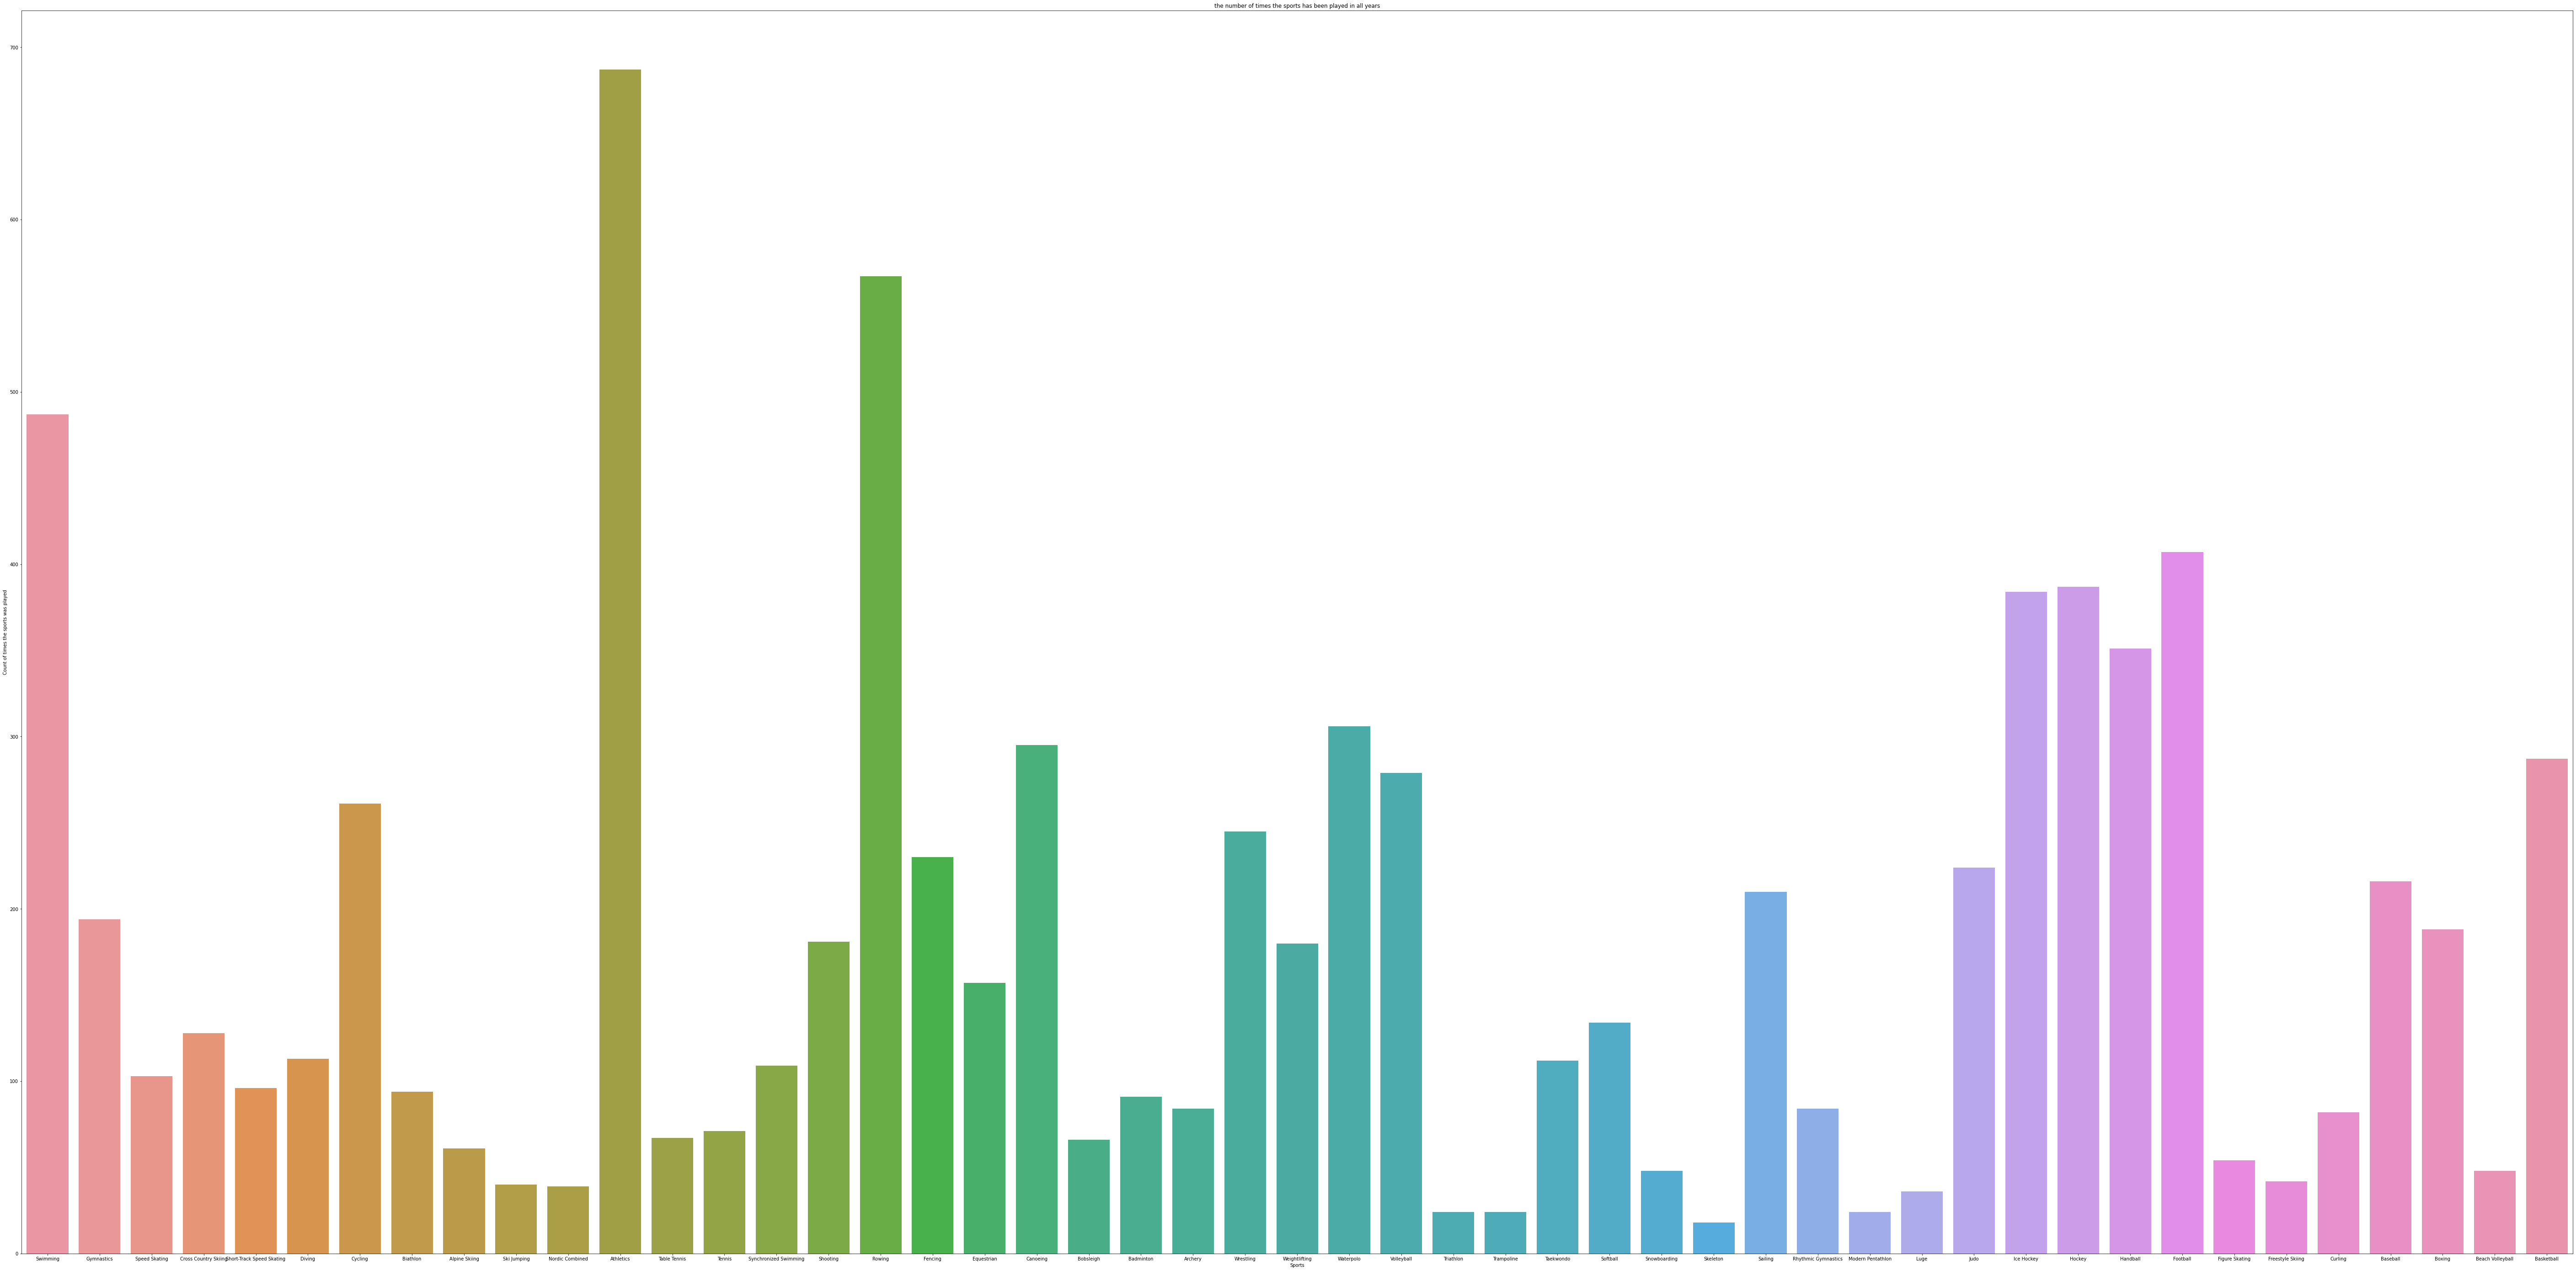

In [ ]:
##the count of times different sports have been played total times.
plt.figure(figsize=(100,50))
plt.title('the number of times the sports has been played in all years')
sns.countplot(x='sports',data=olymp_data)
plt.xlabel('Sports')
plt.ylabel('Count of times the sports was played') 
plt.show()


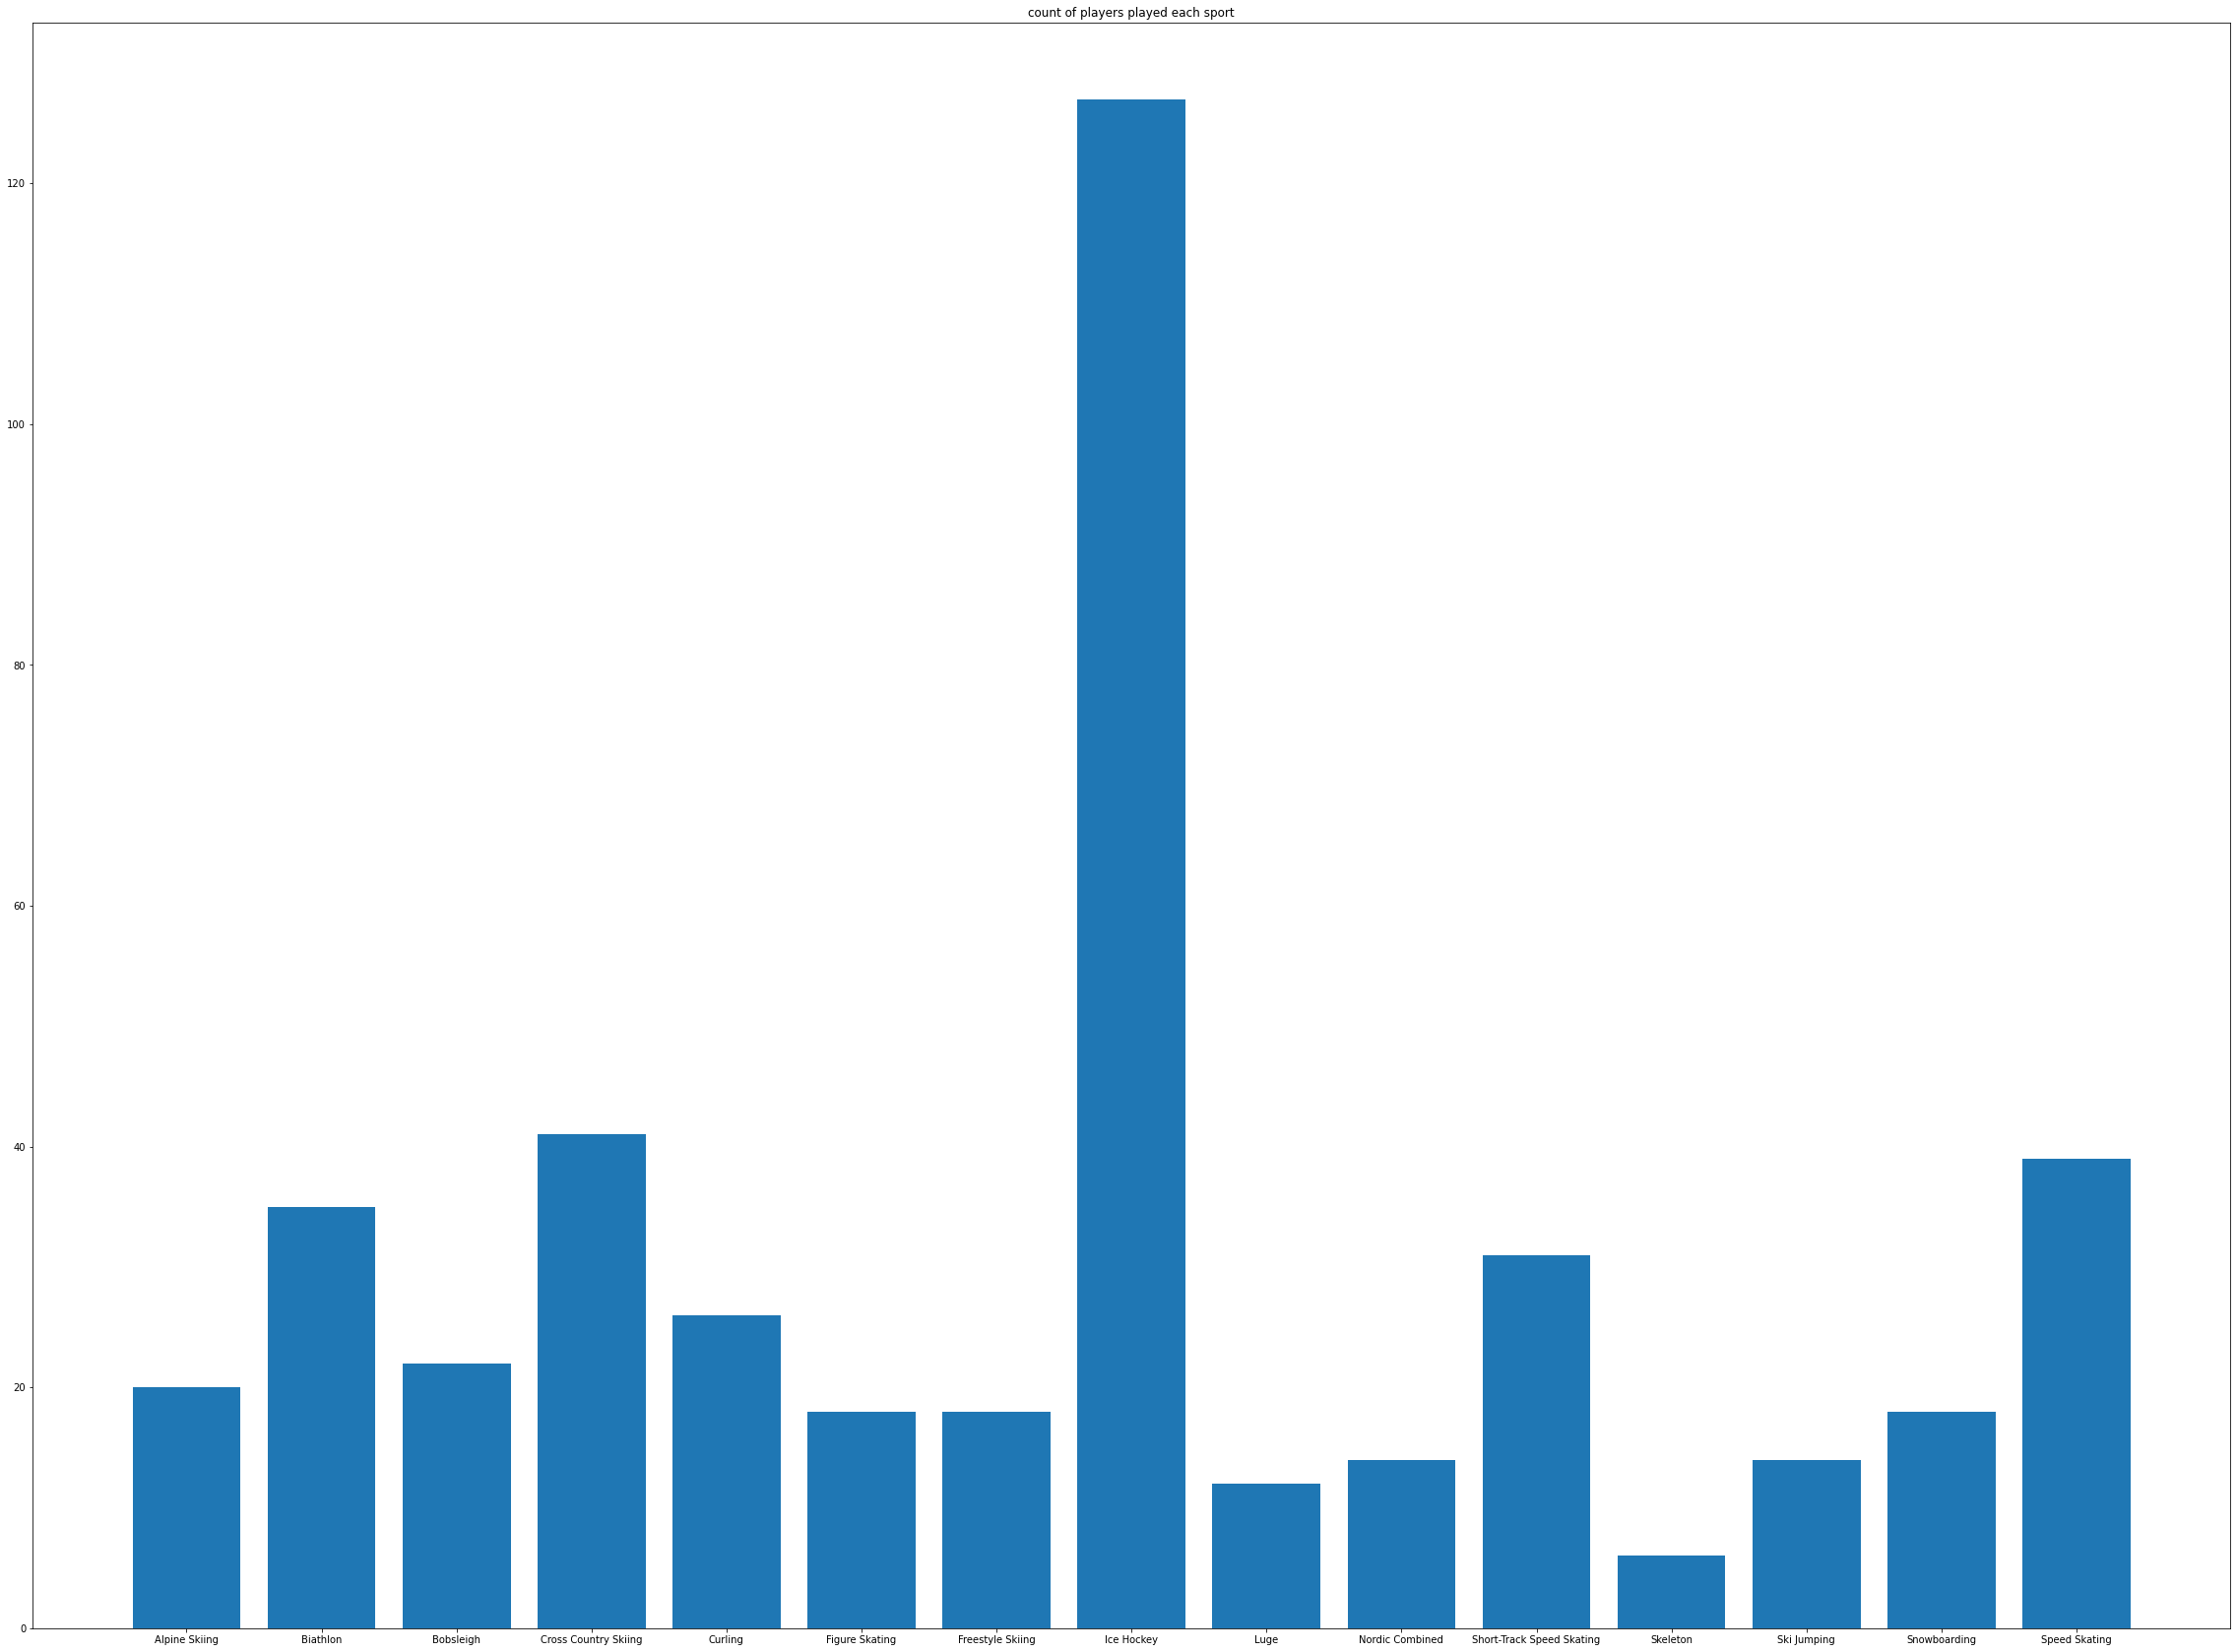

In [ ]:
df_sports_2010=olymp_data[olymp_data['year']==2010] ##creating a dataframe with all the records having year as 2010
res=df_sports_2010.groupby(by='sports')['name'].count()
x=list(res.index) ##creating a list of different sports
y=list(res.values) ##creating a list of count of athletes who played each sport

plt.figure(figsize=(40,30))
plt.bar(x,y) ##plotting a bar graph for each sport and the total count of players in each sport
plt.title('count of players played each sport')
plt.show()



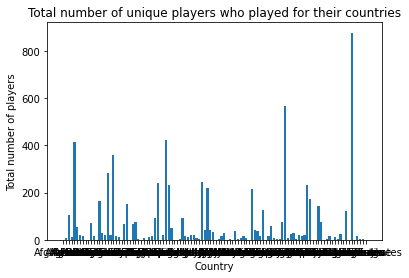

In [ ]:
##plotting a graph for total number of athletes in each country

df_total_athletes=olymp_data.groupby(by='country')['name'].unique() ##getting all the unique players who played for each country

x=list(df_total_athletes.index) ##creating a list of all the countries
count=[] ##creating an empty list to store the count of unique players
for tot in df_total_athletes.values: ##running a for loop to count the total number of unique players in each country 
  y=len(tot) ##finding out the total number of unique players
  count.append(y) ##appending the count list with the total number of unique players

plt.bar(x,count) ##plotting the bar graph
plt.title('Total number of unique players who played for their countries')
plt.xlabel('Country')
plt.ylabel('Total number of players')
plt.show()



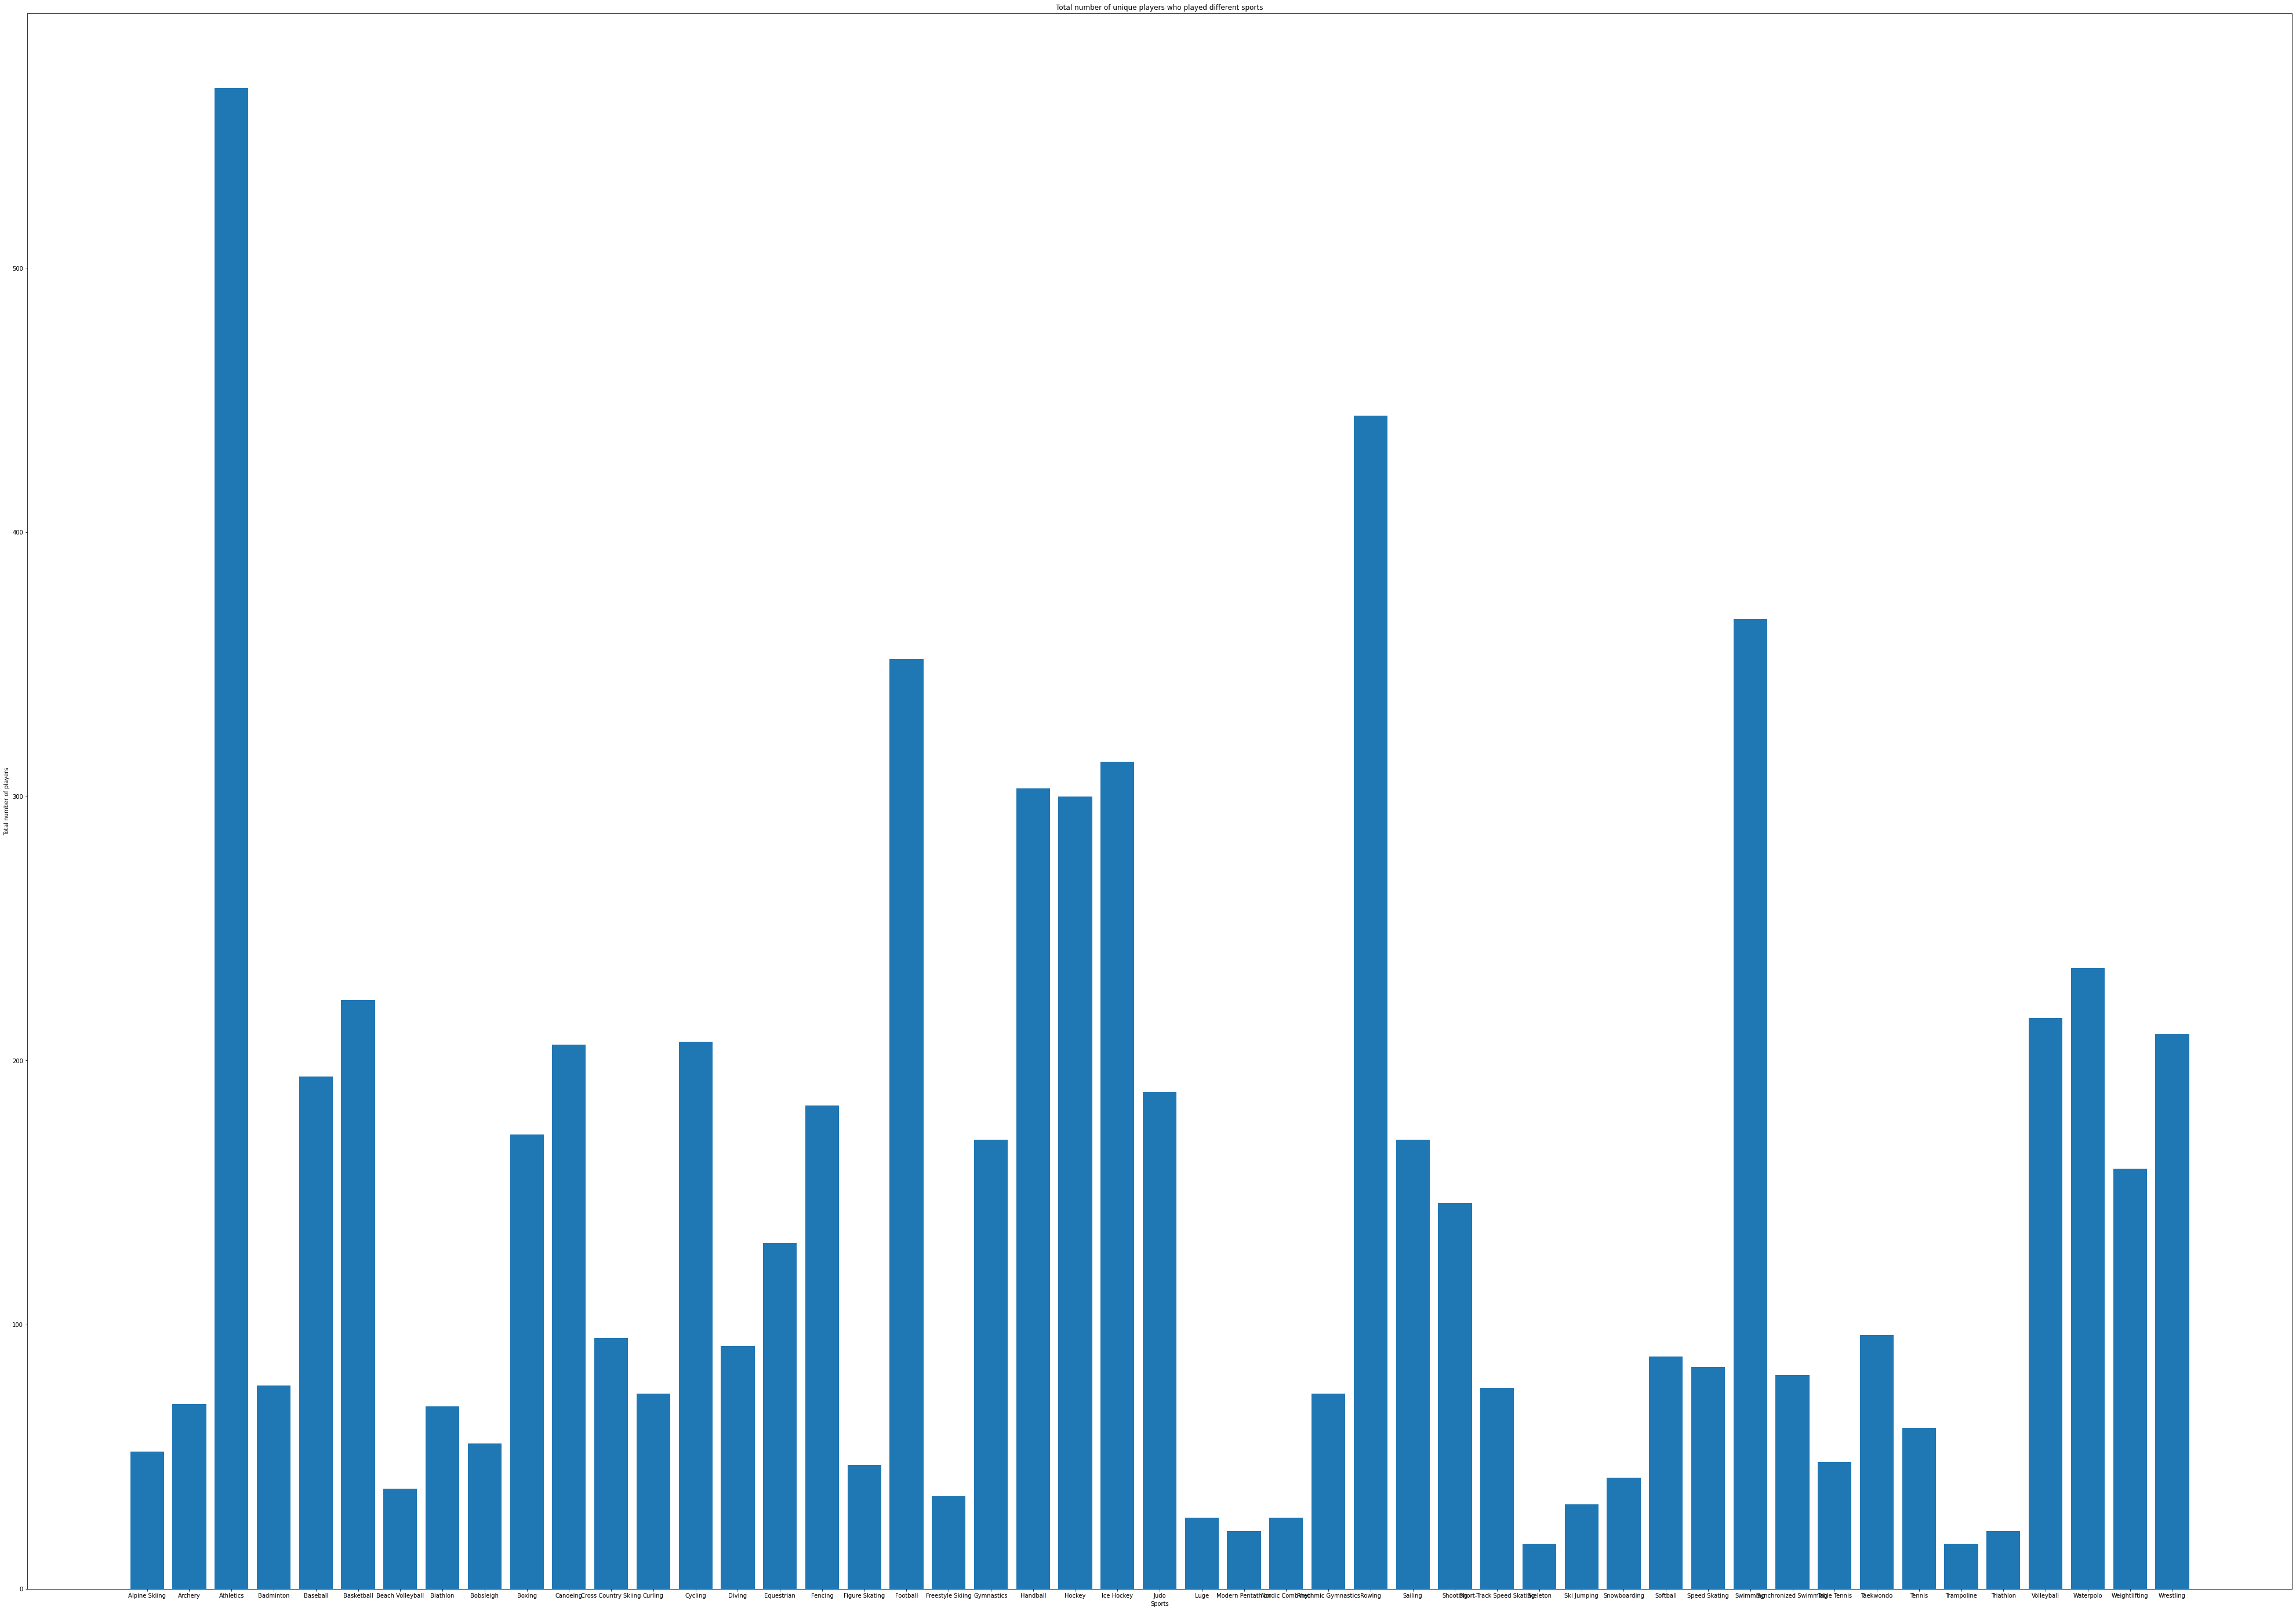

In [ ]:
##plotting a bar graph for total number of unique players who played each sport

df_total_athletes_for_sports=olymp_data.groupby(by='sports')['name'].unique() ##getting all the unique players who played for each sport

x=list(df_total_athletes_for_sports.index) ##creating a list of all the countries
count=[] ##creating an empty list to store the count of unique players
for tot in df_total_athletes_for_sports.values: ##running a for loop to count the total number of unique players in each country 
  y=len(tot) ##finding out the total number of unique players
  count.append(y) ##appending the count list with the total number of unique players
plt.figure(figsize=(70,50))
plt.bar(x,count) ##plotting the bar graph
plt.title('Total number of unique players who played different sports')
plt.xlabel('Sports')
plt.ylabel('Total number of players')
plt.show()


country
Afghanistan      0
Algeria          2
Argentina       49
Armenia          0
Australia      163
              ... 
Uruguay          0
Uzbekistan       5
Venezuela        1
Vietnam          0
Zimbabwe         2
Name: gold_medal, Length: 110, dtype: int64


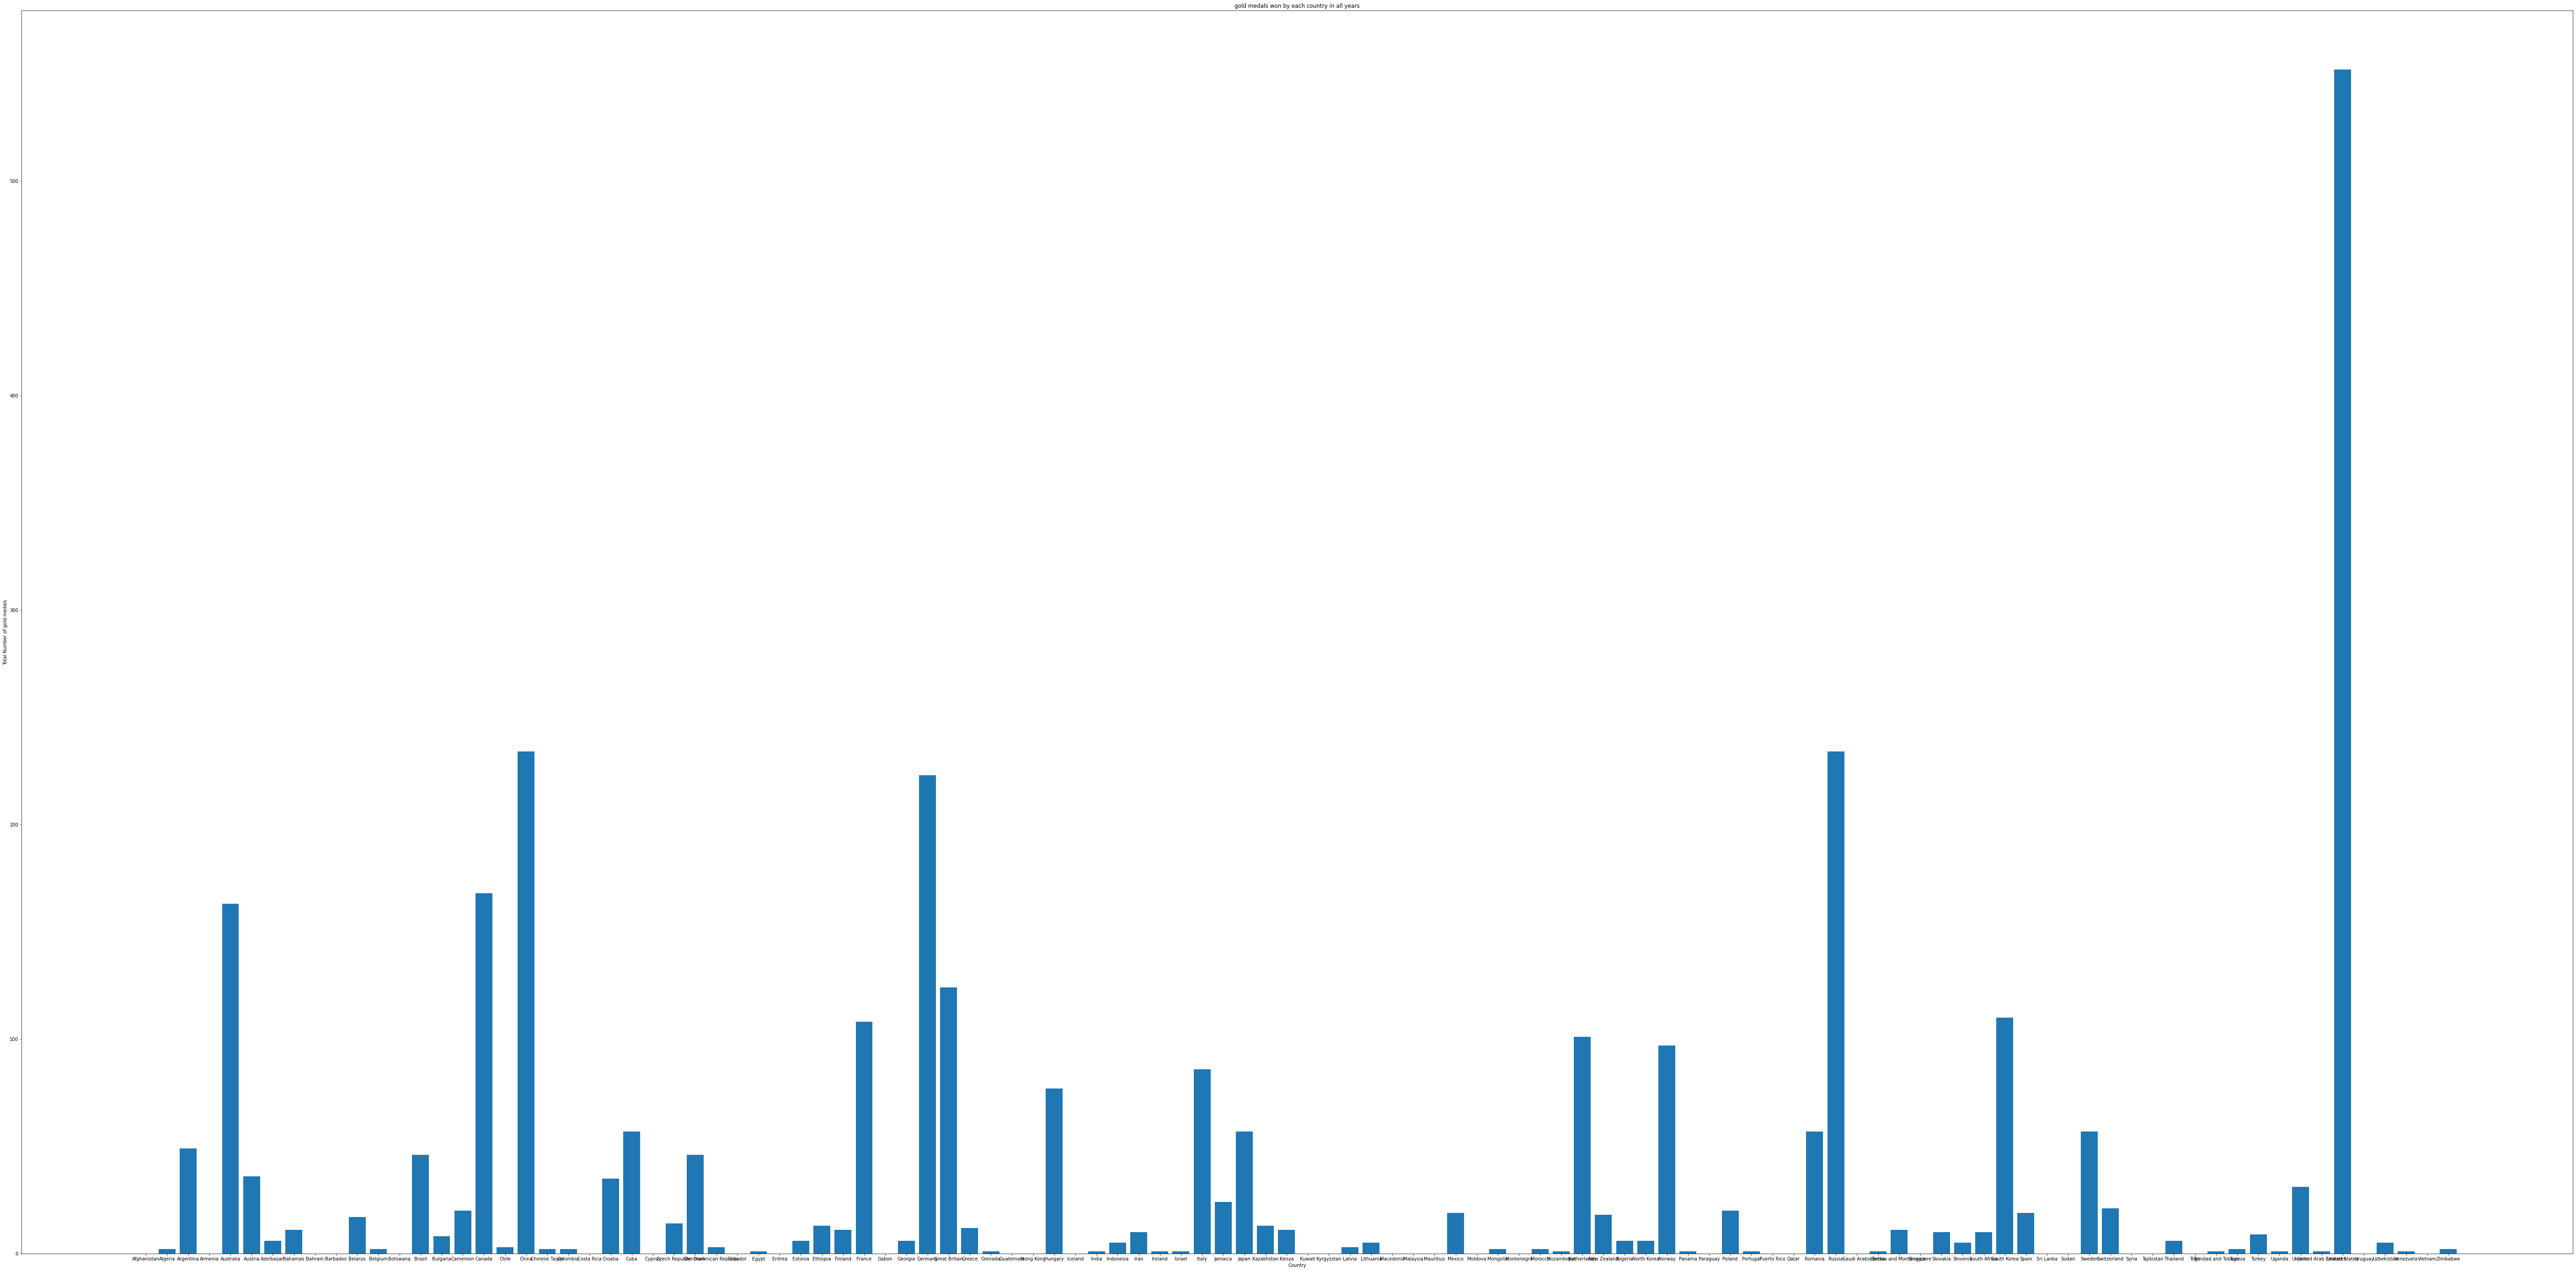

In [ ]:
##the gold medals won by different countries

res=olymp_data.groupby(by='country') ['gold_medal'].sum()
print(res)

x=list(res.index)
y=list(res.values)
plt.figure(figsize=(100,50))
plt.title('gold medals won by each country in all years')
plt.bar(x,y)
plt.xlabel('Country')
plt.ylabel('Total Number of gold medals')
plt.show()

country
Afghanistan      0
Algeria          2
Argentina       33
Armenia          1
Australia      226
              ... 
Uruguay          1
Uzbekistan       4
Venezuela        0
Vietnam          2
Zimbabwe         4
Name: silver_medal, Length: 110, dtype: int64


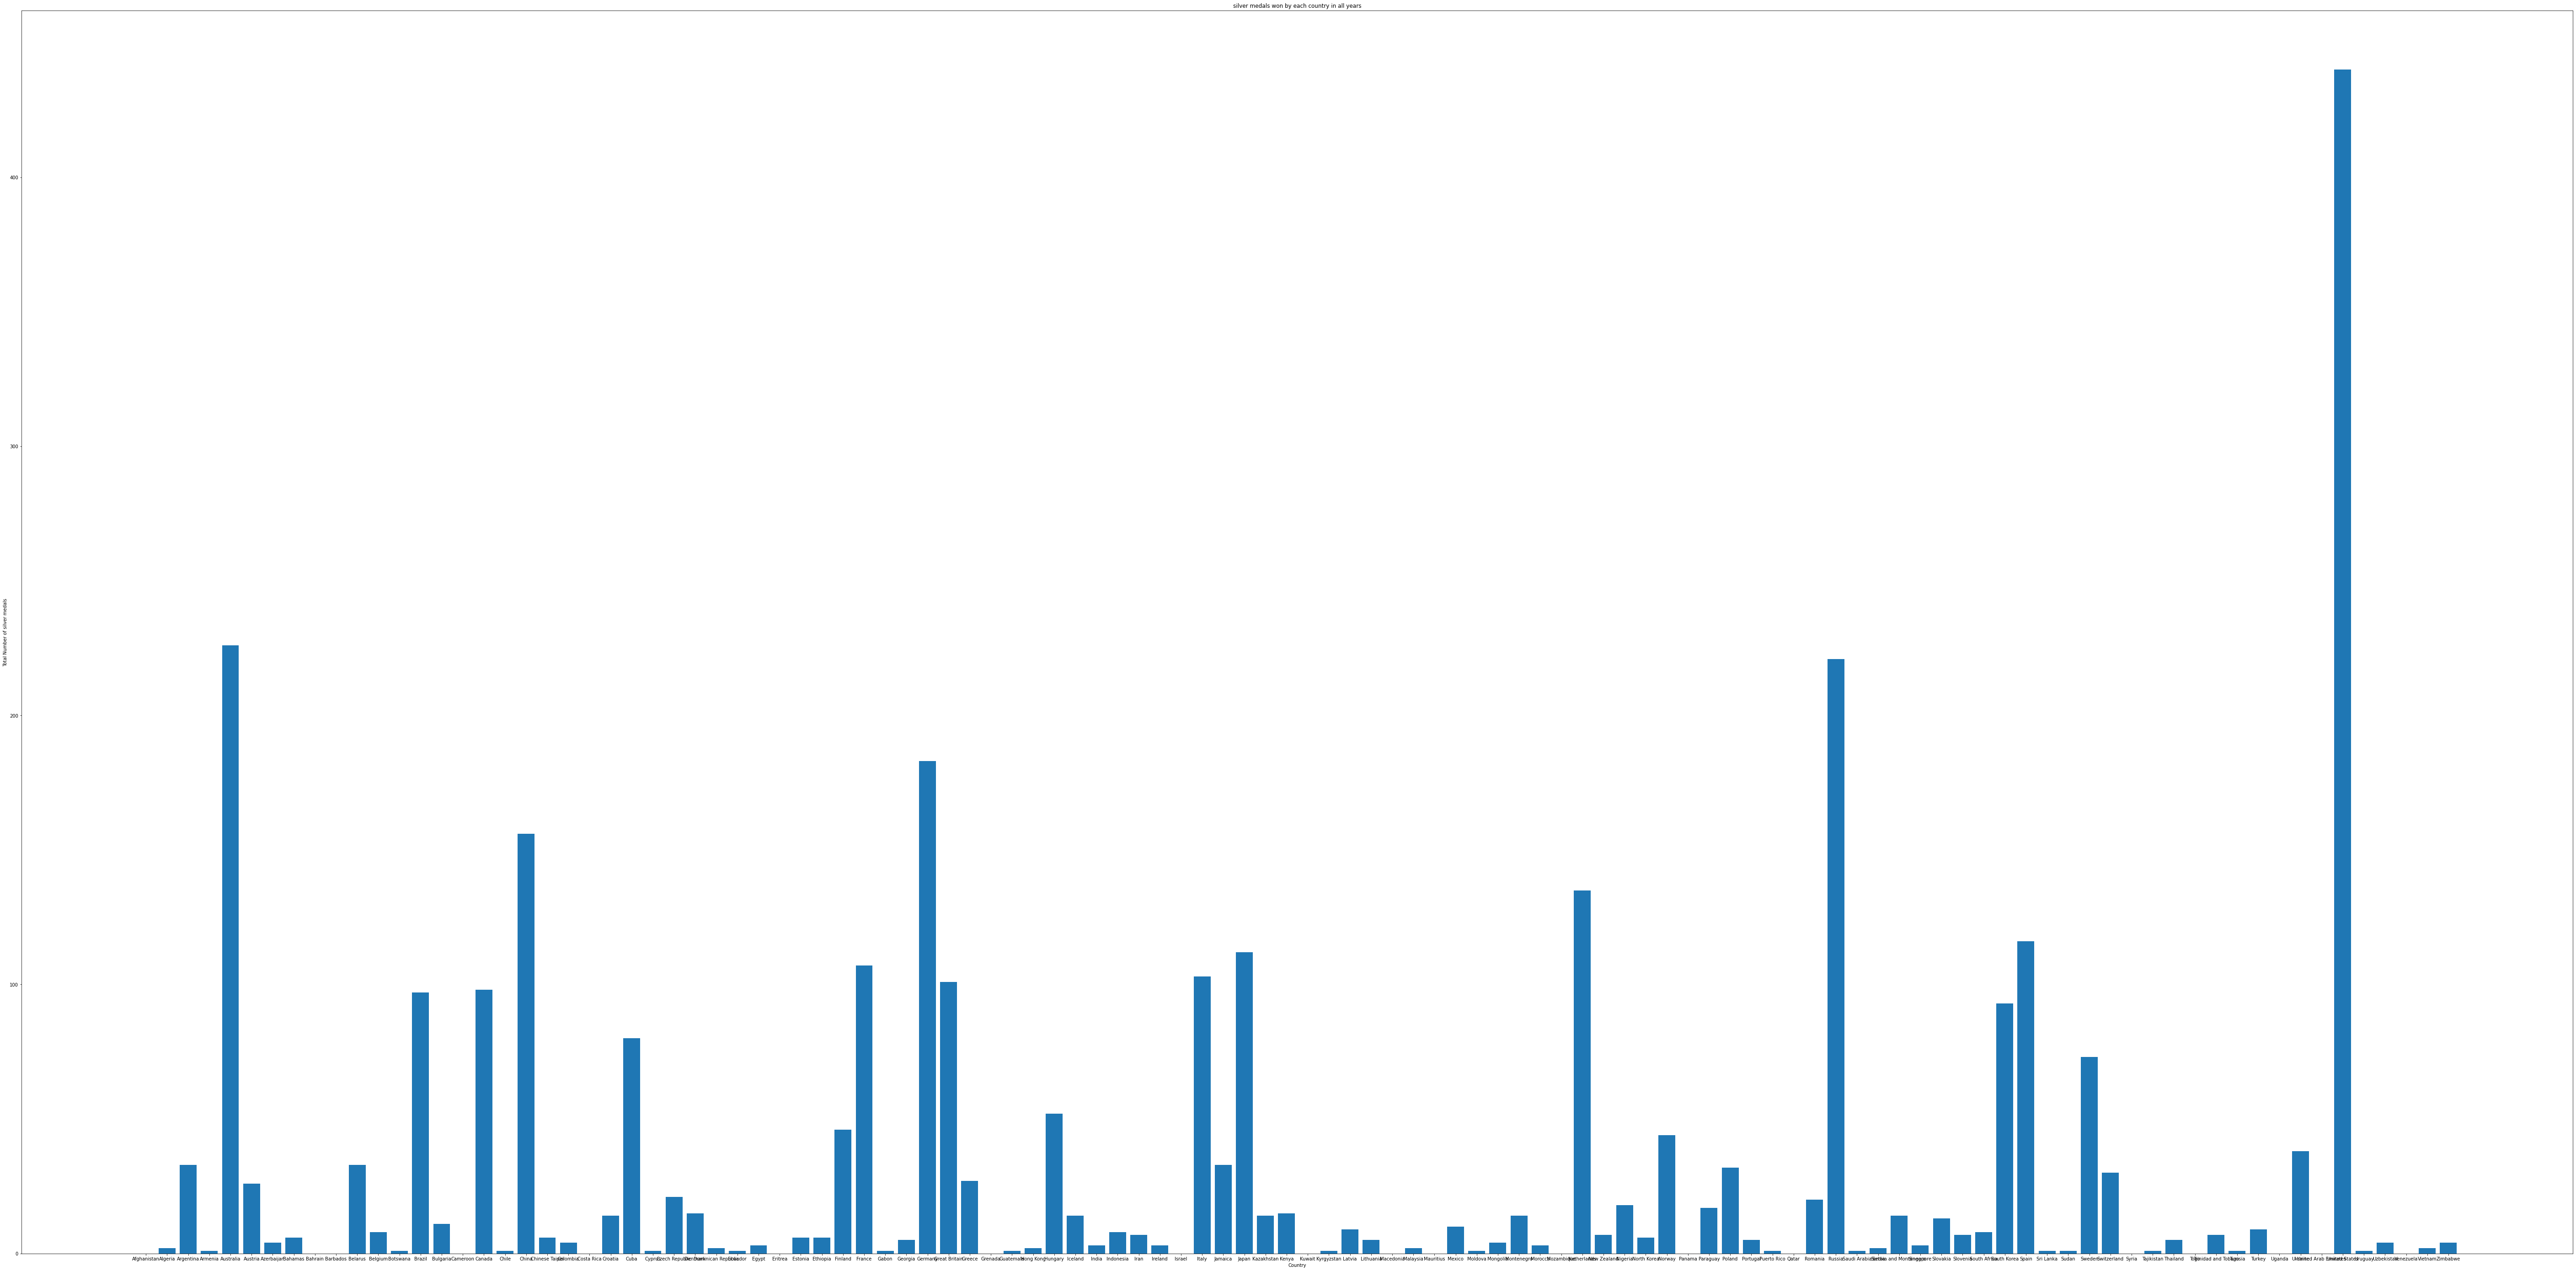

In [ ]:
##the silver medals won by different countries

res=olymp_data.groupby(by='country') ['silver_medal'].sum()
print(res)

x=list(res.index)
y=list(res.values)
plt.figure(figsize=(100,50))
plt.title('silver medals won by each country in all years')
plt.bar(x,y)
plt.xlabel('Country')
plt.ylabel('Total Number of silver medals')
plt.show()

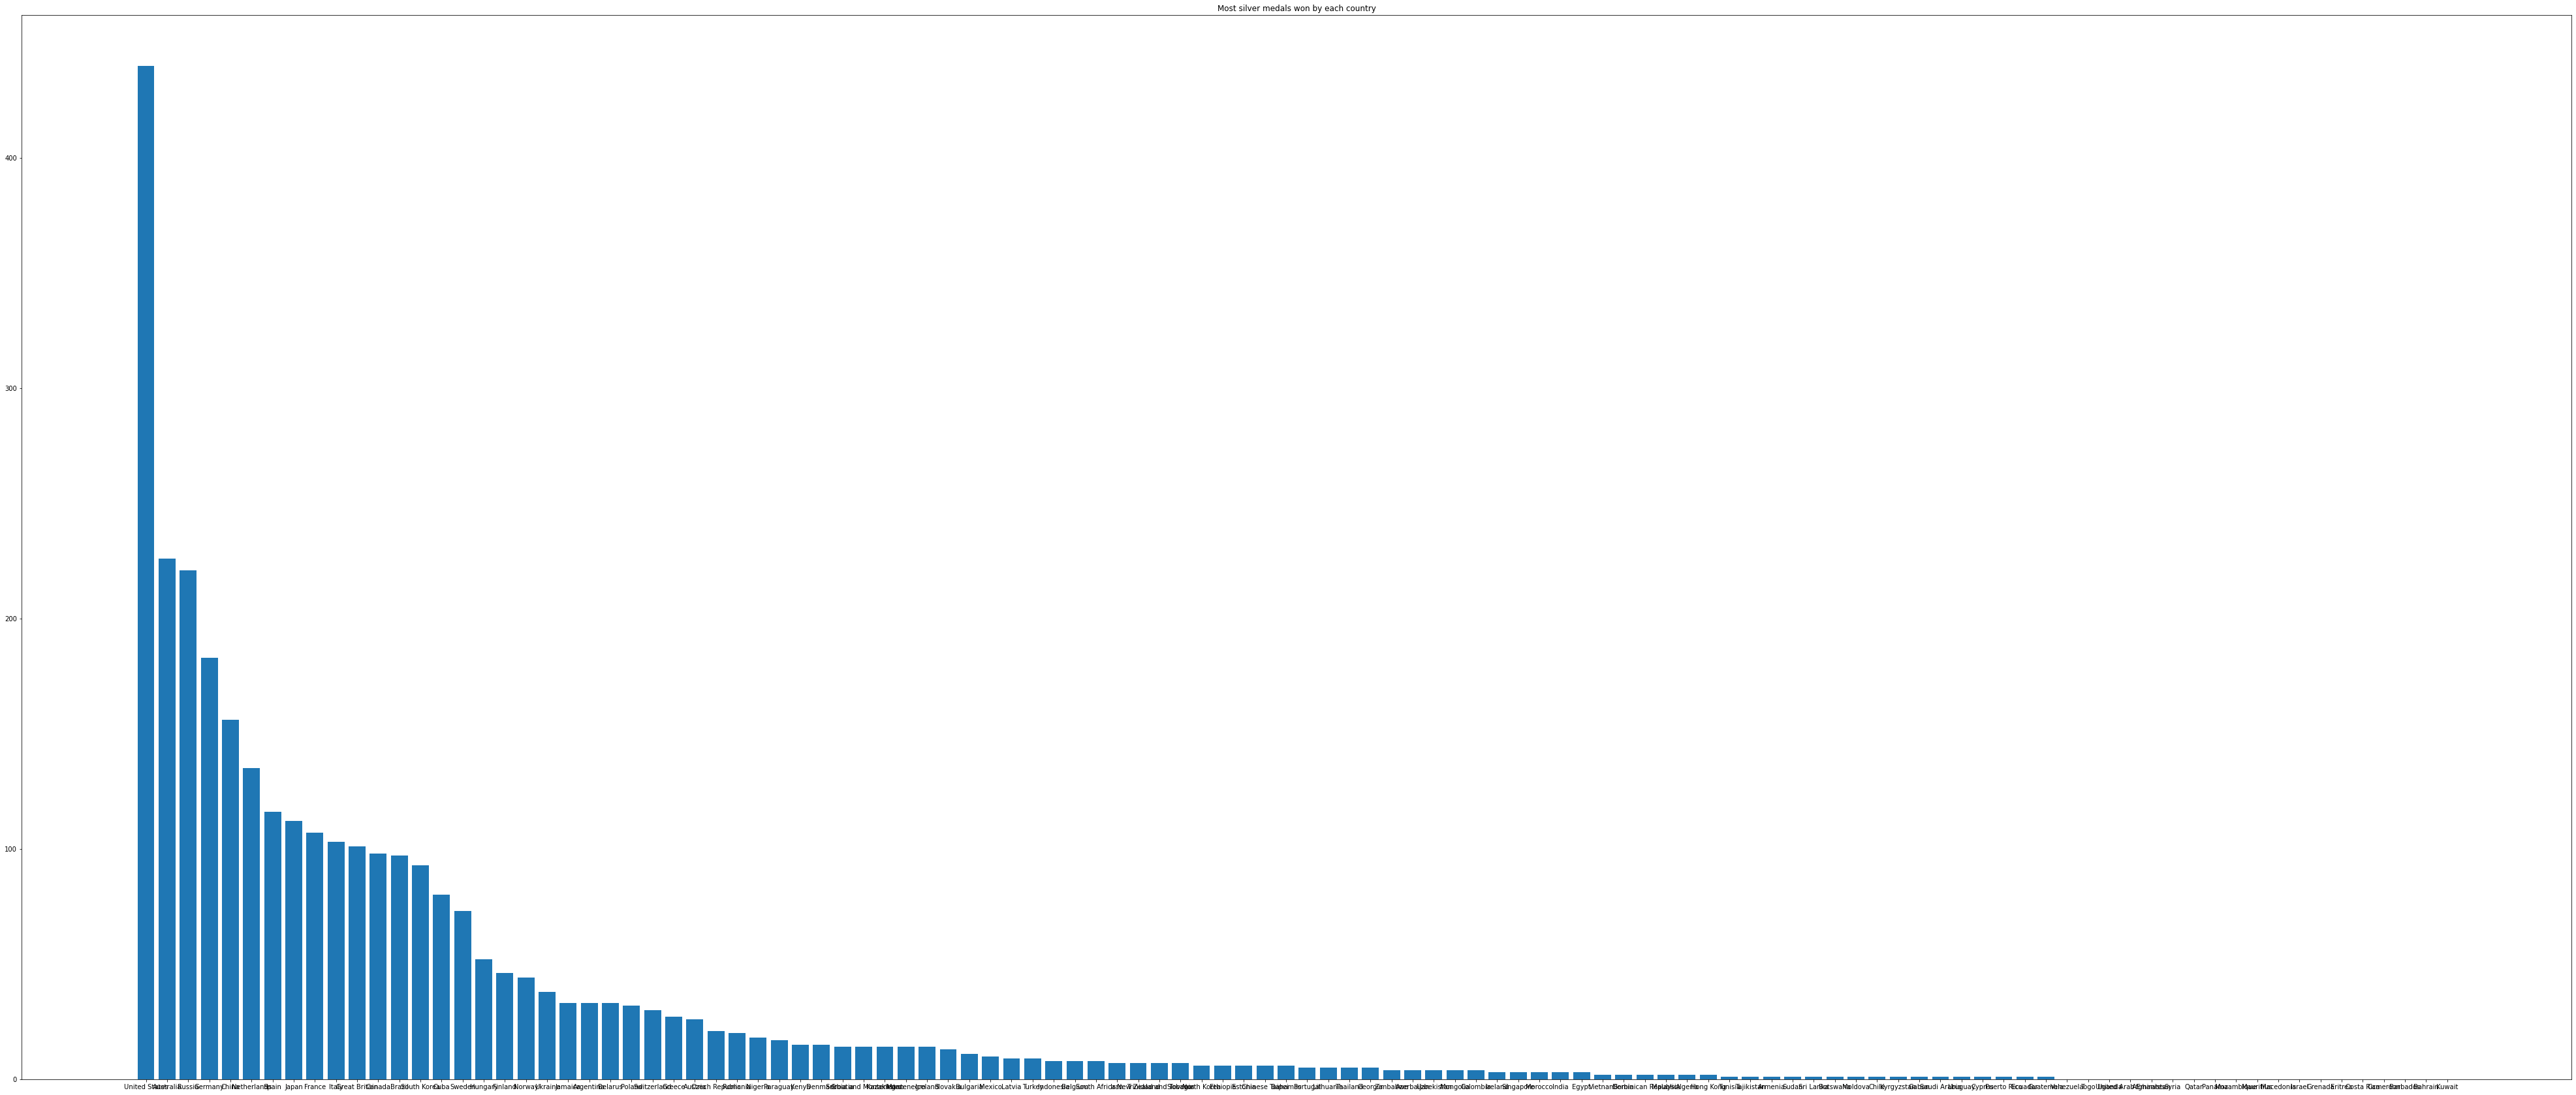

In [ ]:
##plotting a bar graph for countries with most silver medals in descending order
res1={'Country':res.index, 'Silver_medal':res.values} ##creating a dictionary where the keys are countries and the values are the total number of silver medals they won
df=pd.DataFrame(res1) ##converting the dictionary to a dataframe
df=df.sort_values('Silver_medal', ascending=False) ##sorting the dataframe on the basis of total silver medals won.
x=list(df['Country'])
y=list(df['Silver_medal'])
plt.figure(figsize=(70,30))
plt.bar(x,y)
plt.title('Most silver medals won by each country')
plt.show()

country
Afghanistan      2
Algeria          4
Argentina       58
Armenia          9
Australia      220
              ... 
Uruguay          0
Uzbekistan      10
Venezuela        3
Vietnam          0
Zimbabwe         1
Name: brone_medal, Length: 110, dtype: int64


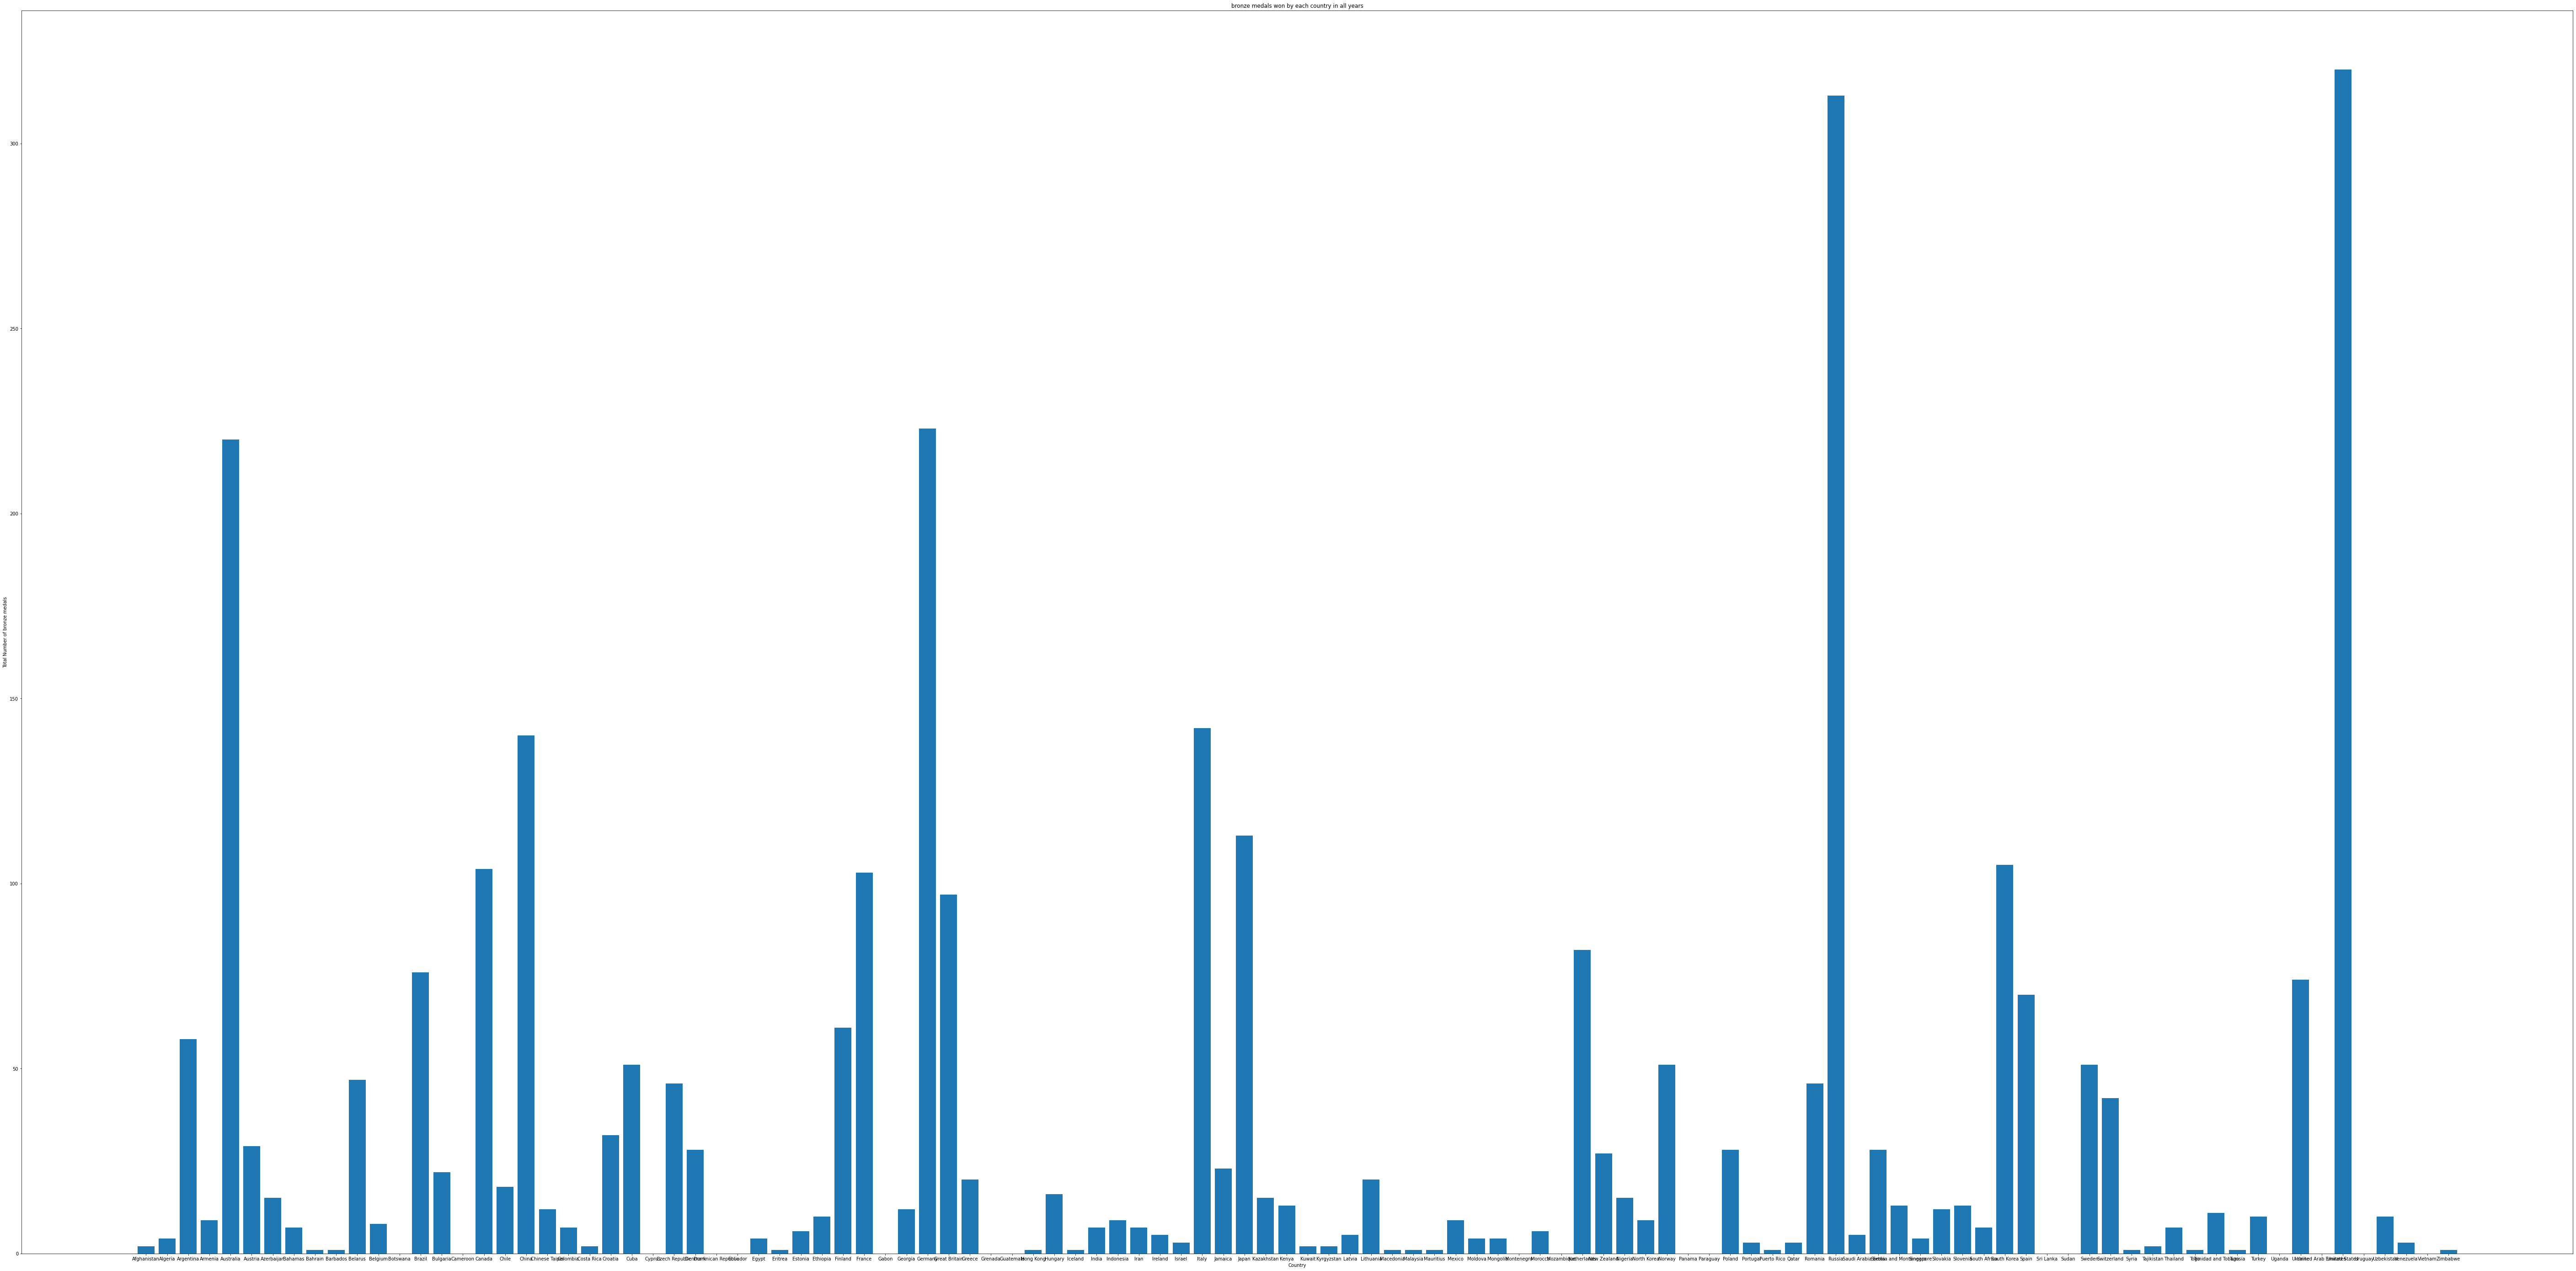

In [ ]:
##the bronze medals won by different countries

res=olymp_data.groupby(by='country') ['brone_medal'].sum()
print(res)

x=list(res.index)
y=list(res.values)
plt.figure(figsize=(100,50))
plt.title('bronze medals won by each country in all years')
plt.bar(x,y)
plt.xlabel('Country')
plt.ylabel('Total Number of bronze medals')
plt.show()

country
Afghanistan      2
Algeria          8
Argentina      140
Armenia         10
Australia      609
              ... 
Uruguay          1
Uzbekistan      19
Venezuela        4
Vietnam          2
Zimbabwe         7
Name: total_medal, Length: 110, dtype: int64


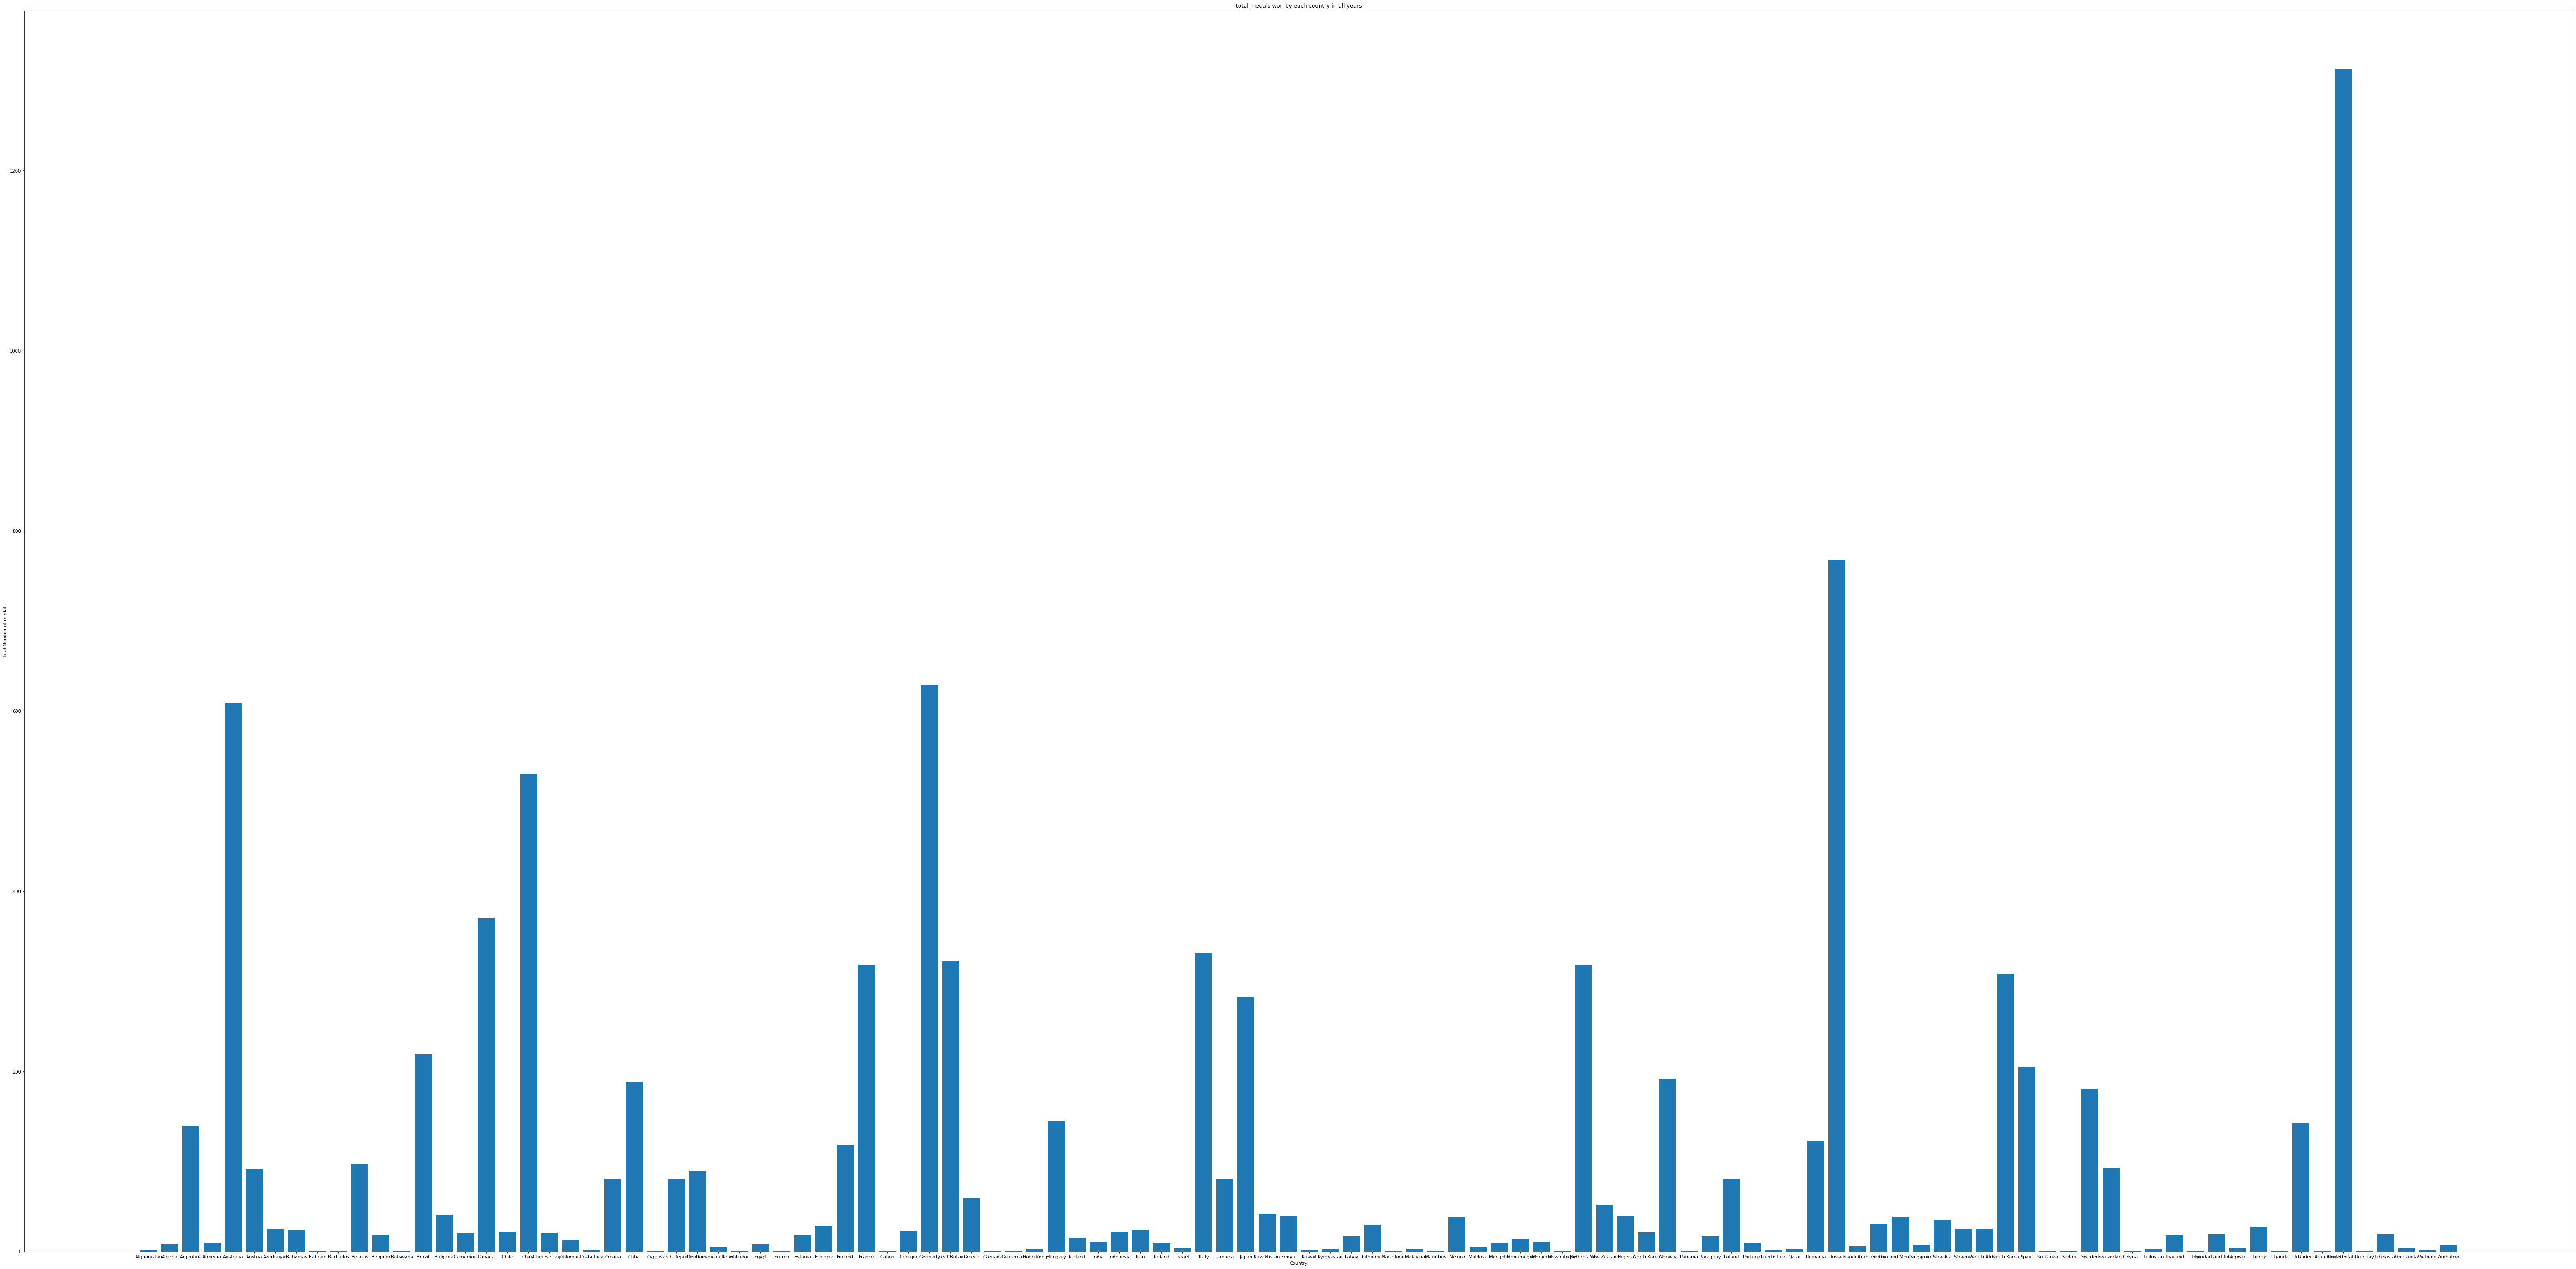

In [ ]:
##the total medals won by different countries

res=olymp_data.groupby(by='country') ['total_medal'].sum()
print(res)

x=list(res.index)
y=list(res.values)
plt.figure(figsize=(100,50))
plt.title('total medals won by each country in all years')
plt.bar(x,y)
plt.xlabel('Country')
plt.ylabel('Total Number of medals')
plt.show()

In [ ]:
## analysing the age distribution on different years and performing transformation for it

df_distinct_years=olymp_data['year'].unique()
df_distinct_years ##getting all the different years in which the olympics were played.

array([2008, 2004, 2012, 2000, 2006, 2010, 2002])

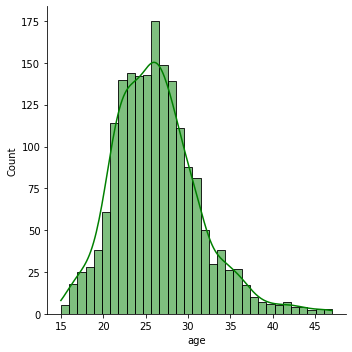

0.7575412628387644


In [ ]:
##for year 2000
df_ages_2000=olymp_data[olymp_data['year']==2000]
sns.displot(df_ages_2000['age'],color='green',kde=True)
plt.show()
print(df_ages_2000['age'].skew(axis=0))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


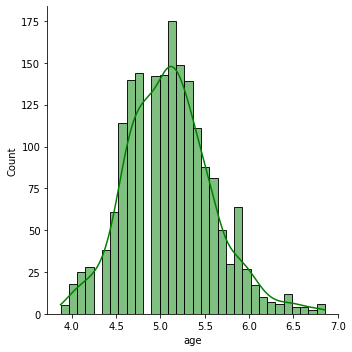

0.41721901229724845


In [ ]:
df_ages_2000['age']=np.sqrt(df_ages_2000['age']) ##the age data as it is right skewed using square root method, the square root method is used to normalize moderately skewed data.
sns.displot(df_ages_2000['age'],color='green',kde=True) ##setting kde to true is for getting a line chart along with the distribution plot.
plt.show()
print(df_ages_2000['age'].skew(axis=0))

The skewness value for age data for year 2000 
has now been reduced and in a range of -.5 to .5 where the distribution can be considered fairly symmetric.

In [ ]:
##for year 2002

df_ages_2002=olymp_data[olymp_data['year']==2002]

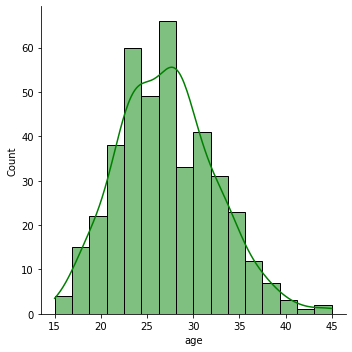

0.37553379163661044


In [ ]:
sns.displot(df_ages_2002['age'],color='green',kde=True)
plt.show()
print(df_ages_2002['age'].skew(axis=0))

The skewness measure for age data of 2002 shows that it is already normally distributed.

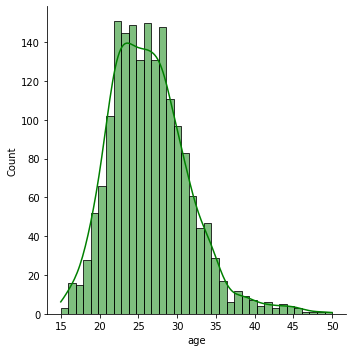

0.7996204234195236


In [ ]:
##for year 2004

df_ages_2004=olymp_data[olymp_data['year']==2004]
sns.displot(df_ages_2004['age'],color='green',kde=True)
plt.show()
print(df_ages_2004['age'].skew(axis=0))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


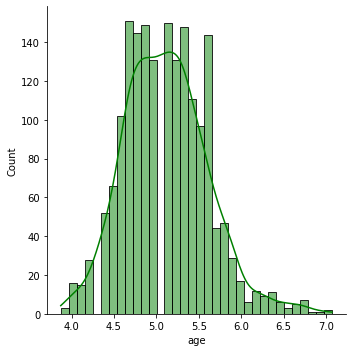

0.4585264481921045


In [ ]:

df_ages_2004['age']=np.sqrt(df_ages_2004['age'])
sns.displot(df_ages_2004['age'],color='green',kde=True)
plt.show()
print(df_ages_2004['age'].skew(axis=0))


The skewness value for age data 2004 has now been reduced and in a range of -.5 to .5 where the distribution can be considered fairly symmetric.

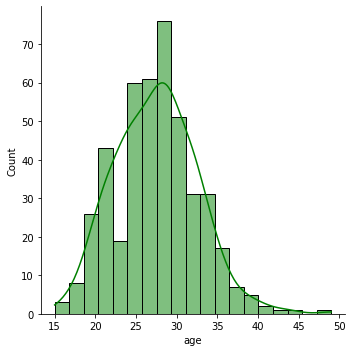

0.33133709127737204


In [ ]:
##for year 2006

df_ages_2006=olymp_data[olymp_data['year']==2006]
sns.displot(df_ages_2006['age'],color='green',kde=True)
plt.show()
print(df_ages_2006['age'].skew(axis=0))

The skewness measure for age data of 2006 shows that it is already normally distributed.

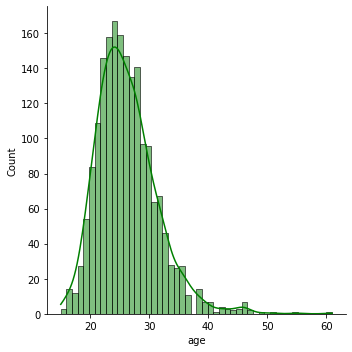

1.0909136225193952


In [ ]:
##for year 2008

df_ages_2008=olymp_data[olymp_data['year']==2008]
sns.displot(df_ages_2008['age'],color='green',kde=True)
plt.show()
print(df_ages_2008['age'].skew(axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


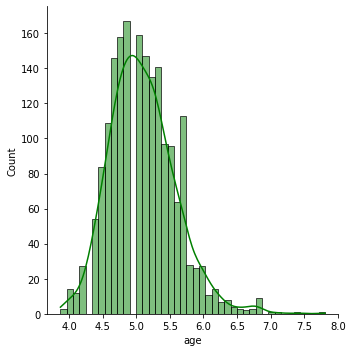

0.6720297991290677


In [ ]:
df_ages_2008['age']=np.sqrt(df_ages_2008['age'])
sns.displot(df_ages_2008['age'],color='green',kde=True)
plt.show()
print(df_ages_2008['age'].skew(axis=0))

The skewness value for age data 2008 has now been reduced to some extent but still is moderately skewed.

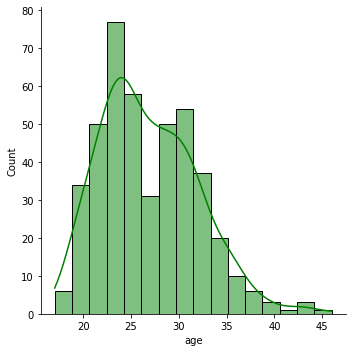

0.591716125983845


In [ ]:
##for year 2010

df_ages_2010=olymp_data[olymp_data['year']==2010]
sns.displot(df_ages_2010['age'],color='green',kde=True)
plt.show()
print(df_ages_2010['age'].skew(axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


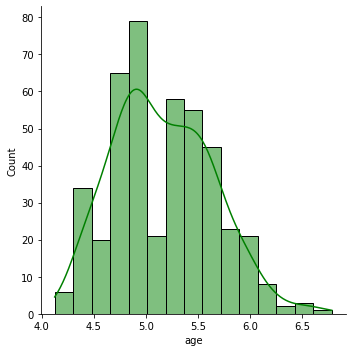

0.3598704769265748


In [ ]:
df_ages_2010['age']=np.sqrt(df_ages_2010['age'])
sns.displot(df_ages_2010['age'],color='green',kde=True)
plt.show()
print(df_ages_2010['age'].skew(axis=0))

The skewness value for age data 2010 has now been reduced and in a range of -.5 to .5 where the distribution can be considered fairly symmetric.

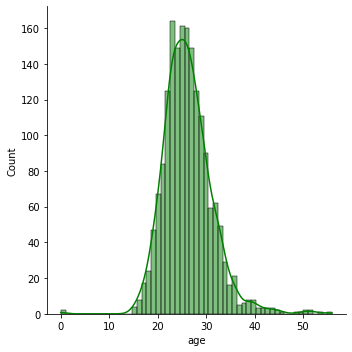

0.9350091142948208


In [ ]:
##for year 2012

df_ages_2012=olymp_data[olymp_data['year']==2012]
sns.displot(df_ages_2012['age'],color='green',kde=True)
plt.show()
print(df_ages_2012['age'].skew(axis=0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


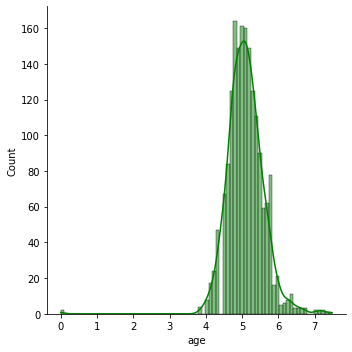

-0.6017175705677034


In [ ]:
df_ages_2012['age']=np.sqrt(df_ages_2012['age'])
sns.displot(df_ages_2012['age'],color='green',kde=True)
plt.show()
print(df_ages_2012['age'].skew(axis=0))

The skewness value for age data 2012 has now been reduced to some extent but still is moderately skewed towards the left.

0.8228435580507557


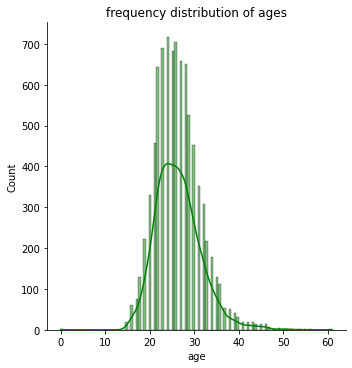

<Figure size 1440x720 with 0 Axes>

In [ ]:


##checking the age column of all the years combined :-


sns.displot(df2['age'],color='green',kde=True) ##kde=True gives a line chart along with ditribution plot
plt.title('frequency distribution of ages')
plt.figure(figsize=(20,10))
print(df2['age'].skew(axis=0)) ##skew at axis=0 will show the skewness measure of age data ; using the copy of the datframe to avoid changes in original dataframe for further analysis


In [ ]:
'''with the histogram we can consider the age data to be right skewed  ; as the mean of the ages is slightly greater than the median of ages.'''

##Normalizing the distribution
df2['age']=np.sqrt(df2['age']) ##using the copy of the originational dataframe for normalizing to avoid introducing changes to original dataframe for further anlysis ;the age data as it is right skewed using square root method, the square root method is used to normalize moderately skewed data.


0.2180394674141904


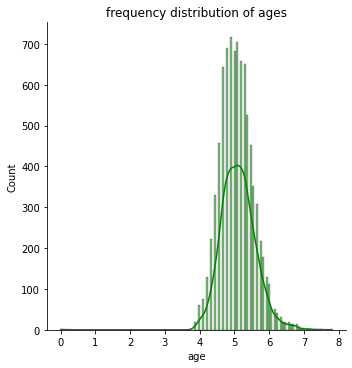

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.displot(df2['age'],color='green',kde=True)
plt.title('frequency distribution of ages')
plt.figure(figsize=(20,10))
print(df2['age'].skew(axis=0)) ##skew at axis=0 will show the skewness measure of age data 


### The skewness value for age data has now been reduced and in a range of -.5 to .5 where the distribution can be considered fairly symmetric.

In [ ]:
'''The distribution plot also shows that now the data is fairly symmetric , but while normalizing the age distribution the exact ages have been changed for each player because of applying the square root method to make the distribution symmetric.'''

'The distribution plot also shows that now the data is fairly symmetric , but while normalizing the age distribution the exact ages have been changed for each player because of applying the square root method to make the distribution symmetric.'

In [ ]:
##Performing appropriate numerical measures on each column

##creating a dataframe of numerical columns from the olymp_data dataframe

olymp_data_nums=olymp_data[['age','gold_medal','silver_medal','brone_medal','total_medal']].copy()
olymp_data_nums

,age,gold_medal,silver_medal,brone_medal,total_medal
0,23.0,8,0,0,8
1,19.0,6,0,2,8
2,27.0,4,2,0,6
3,25.0,1,2,3,6
4,24.0,2,1,3,6
...,...,...,...,...,...
8613,32.0,0,1,0,1
8614,17.0,0,1,0,1
8615,21.0,0,0,1,1
8616,31.0,0,0,1,1


In [ ]:
##statistical summaries of all the numerical columns

olymp_data_nums.describe()

,age,gold_medal,silver_medal,brone_medal,total_medal
count,8615.000000,8615.000000,8615.000000,8615.000000,8615.000000
mean,26.399304,0.364829,0.363088,0.377829,1.105746
std,5.117364,0.545401,0.511564,0.505044,0.408958
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,8.000000,3.000000,3.000000,8.000000


###Statistical summaries of the numerical columns:

1. Age: '''The mean age of the athletes is 26.399304.
        The median age of the athlete is 26.
        The oldest athlete played in the olympics is 61 years old.
        The SD for the age is 5.117364.
        The mean age is greater than the median age wgich means the age
        distribution will be moderately skewed.'''

2. Gold Medal:'''The average number of gold medal won by the athletes is 
        0.364829
        The median value for gold medals won by the athlete is 0,i.e
        the athlete in the median value position has not won any gold 
        medal.
        The maximum number of gold medals won by an athlete for a sport
        on a given date is 8.
        The SD for the gold medals is 0.545401.
        The mean number of gold medals won differs a lot with the median
        value of gold medals won which means the distribution for gold
        medals will be highly skewed.'''

3. Silver_Medal: '''The average number of silver medal won by the athletes
        is 0.363088. 
        The median value for silver medals won by the athlete is 0,i.e
        the athlete in the median value position has not won any silver 
        medal.
        The maximum number of silver medals won by an athlete for a sport
        on a given date is 3.
        The SD for the silver medals is 0.511564.
        The mean number of silver medals won differs a lot with the median
        value of silver medals won which means the distribution for silver
        medals will be highly skewed.'''

        
4. Bronze Medal: '''The average number of bronze medal won by the athletes
        is 0.377829. 
        The median value for bronze medals won by the athlete is 0,i.e
        the athlete in the median value position has not won any bronze
        medal.
        The maximum number of bronze medals won by an athlete for a sport
        on a given date is 3.
        The SD for the bronze medals is 0.505044.
        The mean number of bronze medals won differs a lot with the median
        value of bronze medals won which means the distribution for bronze
        medals will be highly skewed.''' 

5. Total Medals: '''The average number of total medal won by the athletes
        is 1.105746. 
        The median value for total medals won by the athlete is 1,i.e
        the athlete in the median value position has not won any bronze
        medal.
        The maximum number of total medals won by an athlete for a sport
        on a given date is 8.
        The SD for the total medals is 0.408958.
        The mean number of total medals won differs a lot with the median
        value of total medals won which means the distribution for total
        medals will be highly skewed.'''               


In [ ]:
#Top 10 countries with most gold medals.

top_10_countries_with_gold_medals=olymp_data.groupby(by='country')['gold_medal'].sum()
top_10_countries_with_gold_medals.sort_values(ascending=False).head(10) ##sorting the datframe in descending order on the basis of total number of gold medals won.

country
United States    552
Russia           234
China            234
Germany          223
Canada           168
Australia        163
Great Britain    124
South Korea      110
France           108
Netherlands      101
Name: gold_medal, dtype: int64

In [ ]:
#Top 10 countries with most silver medals.

top_10_countries_with_silver_medals=olymp_data.groupby(by='country')['silver_medal'].sum()
top_10_countries_with_silver_medals.sort_values(ascending=False).head(10) ##sorting the datframe in descending order on the basis of total number of silver medals won.

country
United States    440
Australia        226
Russia           221
Germany          183
China            156
Netherlands      135
Spain            116
Japan            112
France           107
Italy            103
Name: silver_medal, dtype: int64

In [ ]:
#Top 10 countries with most bronze medals.

top_10_countries_with_bronze_medals=olymp_data.groupby(by='country')['brone_medal'].sum()
top_10_countries_with_bronze_medals.sort_values(ascending=False).head(10) ##sorting the datframe in descending order on the basis of total number of bronze medals won.

country
United States    320
Russia           313
Germany          223
Australia        220
Italy            142
China            140
Japan            113
South Korea      105
Canada           104
France           103
Name: brone_medal, dtype: int64

In [ ]:
#Top 10 countries with most total medals.

top_10_countries_with_total_medals=olymp_data.groupby(by='country')['total_medal'].sum()
top_10_countries_with_total_medals.sort_values(ascending=False).head(10)

country
United States    1312
Russia            768
Germany           629
Australia         609
China             530
Canada            370
Italy             331
Great Britain     322
France            318
Netherlands       318
Name: total_medal, dtype: int64

In [ ]:
res={'Country':top_10_countries_with_total_medals.index, 'Total medal':top_10_countries_with_total_medals.values}
df=pd.DataFrame(res)
df

,Country,Total medal
0,Afghanistan,2
1,Algeria,8
2,Argentina,140
3,Armenia,10
4,Australia,609
...,...,...
105,Uruguay,1
106,Uzbekistan,19
107,Venezuela,4
108,Vietnam,2
